# Increase Sales Conversion Rates with Machine Learning

## Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

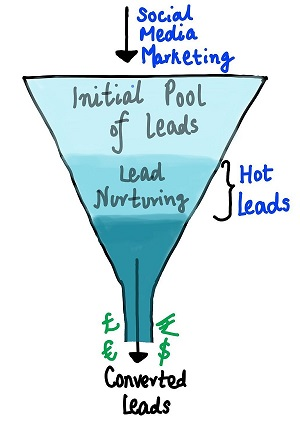

As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

#### X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%

## Goals of the Case Study

There are quite a few goals for this case study.

1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
2. There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

#### <u> Let's focus on goal number 1 here. </u>

### contents:

1. Reading and Understanding Data
    1. Importing libraries
    2. Checking shape, description and info of dataset

2. Data Preparation
    1. ‘Select’ replacement
    2. Null Check
    3. Null Treatment
3. Exploratory Data Analysis(EDA)
    1. Defining Custom functions for visualization
    2. Variable Analysis with respect to target variable
    3. Dropping unnecessary columns
    4. Converting Binary Variables ‘yes’/’no’ to 1/0
    5.Checking correlation between numerical variables
4. Dummy Variable creating from category variables for model generation
5. Train Test Split
	1. Importing library
	2. Creating X and y data set.
	3. Splitting data into Train and Test data set
	4. Feature Scaling
6. Model Building
	1. Feature selection using RFE
	2. Assessing the model with Statsmodels
	3. Predicting values with model built
7. Model Evaluation
	1. Consusion matrix
	2. Accuracy (Train set)
	3. Metrics other than accuracy
	4. ROC curve
8. Optimal Cut-off Point
9. Assigning Lead Score to leads in Train set
10. Precision and Recall TradeOff
11. Prediction on Test set
12. Model Evaluation on Test set
13. Generating Hot leads
14. Conclusion


## 1. Data Reading and Understanding 


### 1.1 Importing libraries

In [1]:
# Importing important Libraries

import numpy as np # I usually import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


pd.options.mode.chained_assignment = None # this prevents unwanted warnings

# Rest will be imported as necessity arrives 😄

In [2]:
# This is important, helpful in having a good look at over all data.
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [3]:
#  Let's get the data loaded

df = pd.read_csv('Leads.csv')

### 1.2 Checking an Overview and Info of the dataset

In [4]:
df.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,Email Opened,India,Supply Chain Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Low in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,Email Opened,India,IT Projects Management,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,Email Opened,India,Finance Management,Word Of Mouth,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


In [5]:
# we need data dictionary, yep we definitely need it. 🤔🤔

In [6]:
df_dict = pd.read_excel('Leads Data Dictionary.xlsx', skiprows=2, index_col = 'Variables' )

In [7]:
df_dict = df_dict.drop('Unnamed: 0', axis=1)

In [8]:
df_dict

,Description
Variables,
Prospect ID,A unique ID with which the customer is identif...
Lead Number,A lead number assigned to each lead procured.
Lead Origin,The origin identifier with which the customer ...
Lead Source,"The source of the lead. Includes Google, Organ..."
Do Not Email,An indicator variable selected by the customer...
Do Not Call,An indicator variable selected by the customer...
Converted,The target variable. Indicates whether a lead ...
TotalVisits,The total number of visits made by the custome...
Total Time Spent on Website,The total time spent by the customer on the we...


In [9]:
# Let's see if we have any duplicate entry

sum(df.duplicated(subset = 'Prospect ID'))

0

In [10]:
# Well we do not have any duplicated user here, 

####  So let's get ahead with data inspection

In [11]:
df.shape

(9240, 37)

In [12]:
# Woah that's alot of columns definitely gotta remove some later.

In [13]:
# let's see what are those columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [14]:
# Yep data needs to be treated.., Let's have descriptions as well.

In [15]:
df.describe([0.05, 0.25, 0.5, 0.9 , 0.95, 0.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
5%,582869.900000,0.000000,0.000000,0.000000,0.000000,12.000000,14.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000,16.000000,19.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000,17.000000,20.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000,17.000000,20.000000


#### we clearly have some outliers here in ['Total Visits','Total Time spent on website','page views per visit']

## 2. Data Preparation

### 2.1 'Select' Replacement

problem statement said - <i>'Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value.'</i>

This may be because when user was asked to select an option from may be a dropdown or something whose default value was 'Select', and they left it as it was. Hmmmm, this might be the reason why problem statement said these select's are as good as null. 

Let's replace these select's to null then, 

In [16]:
df = df.replace('Select', np.nan)

In [17]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### 2.2 Null Check

In [18]:
# So now we have alot of nan's in place of Select's
#LEt's do a null check

df.isnull().sum() 

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [19]:
# number's dont tell much let's do it in percentage and only columns with null values
# getting 'em in decreasing order might help too
df.isnull().mean()[(df.isnull().mean() * 100)>0].sort_values(ascending = False) * 100

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Index                      45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

### 2.3 Null Treatment

####  70% is a good bar, let's just drop columns with more than 70% missing values. They are of no use anyways

In [20]:
df = df.drop(df.loc[:,list(round(100*df.isnull().mean(), 2)>70)].columns, axis = 1)

In [21]:
df.isnull().mean()[(df.isnull().mean() * 100)>0].sort_values(ascending = False) * 100

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Score                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
dtype: float64

#### So These are the columns we need to look out for null values, and impute accordingly. Let's take care of them one by one.

##### Lead Quality

Indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead.
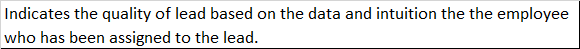

Lead Quality is with more than 51% null values, let's get into it first.


In [22]:
df['Lead Quality'].describe()


count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object

since it is a categorical variable we might have to impute null values based on mode.


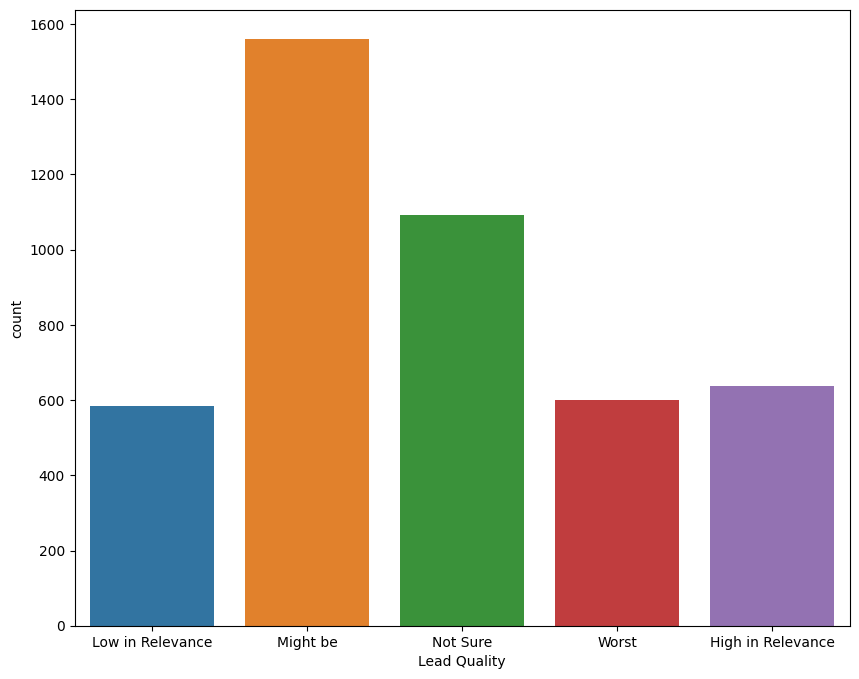

In [23]:

sns.countplot(x =df['Lead Quality'])
fig = plt.gcf()
fig.set_size_inches(10,8)

As we know Lead Quality is solely based on the intiution of the person assigned to the lead, and if he left it blank this means he wasn't sure of the lead. and we have a category "Not Sure" so let's assign Null values as Not sure 

imputing null values as Not sure


In [24]:

df['Lead Quality'].fillna('Not Sure', inplace = True)

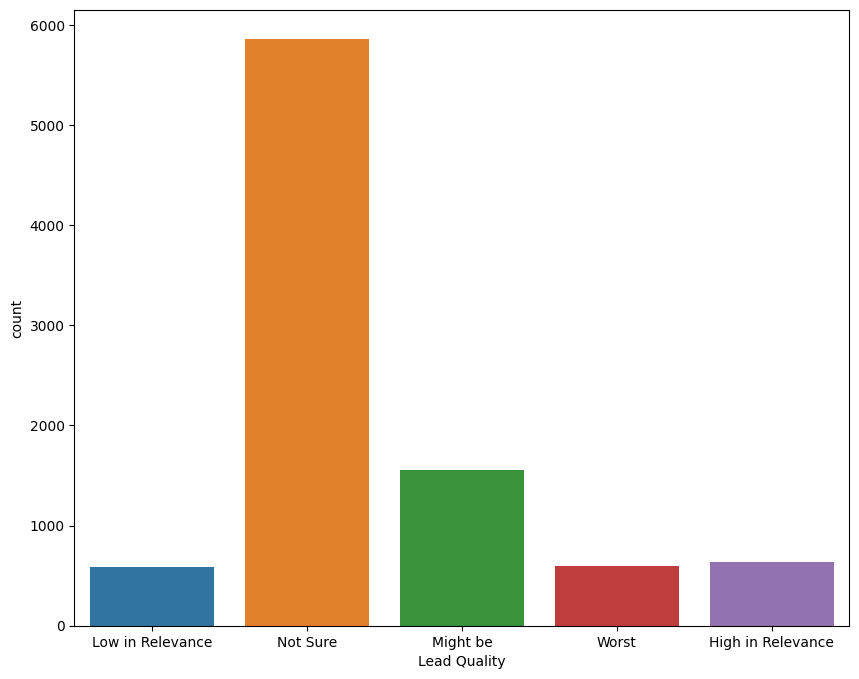

In [25]:
sns.countplot(x =df['Lead Quality'])
fig = plt.gcf()
fig.set_size_inches(10,8)

<h4><u> An index and score assigned to each customer based on their activity and their profile</u></h4>

<b><i> Asymmetrique Activity Index  
 Asymmetrique Profile Index      
 Asymmetrique Activity Score     
 Asymmetrique Profile Score   
</i></b>


 These four coulumns are similar let's check all of the at once


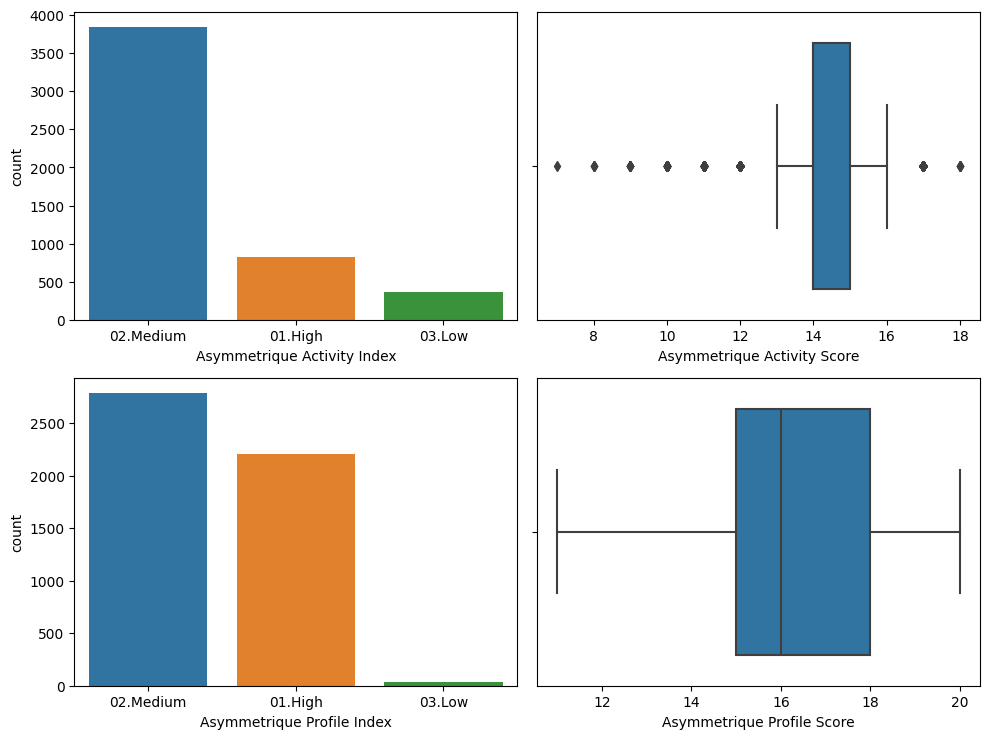

In [26]:

fig, axs = plt.subplots(2,2, figsize = (10,7.5))
plt1 = sns.countplot( x = df['Asymmetrique Activity Index'], ax = axs[0,0])
plt2 = sns.boxplot(x = df['Asymmetrique Activity Score'], ax = axs[0,1])
plt3 = sns.countplot(x = df['Asymmetrique Profile Index'], ax = axs[1,0])
plt4 = sns.boxplot(x = df['Asymmetrique Profile Score'], ax = axs[1,1])
plt.tight_layout()

There is so much variation in these columns that these columns should better be dropped.

In [27]:
df.drop(['Asymmetrique Activity Index',
         'Asymmetrique Activity Score',
         'Asymmetrique Profile Index',
         'Asymmetrique Profile Score'], axis =1, inplace = True)

In [28]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [29]:
# Let's check which column is next..
df.isnull().mean()[(df.isnull().mean() * 100)>0].sort_values(ascending = False) * 100

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
dtype: float64

<hr>

##### City,

it's a categorical variable...


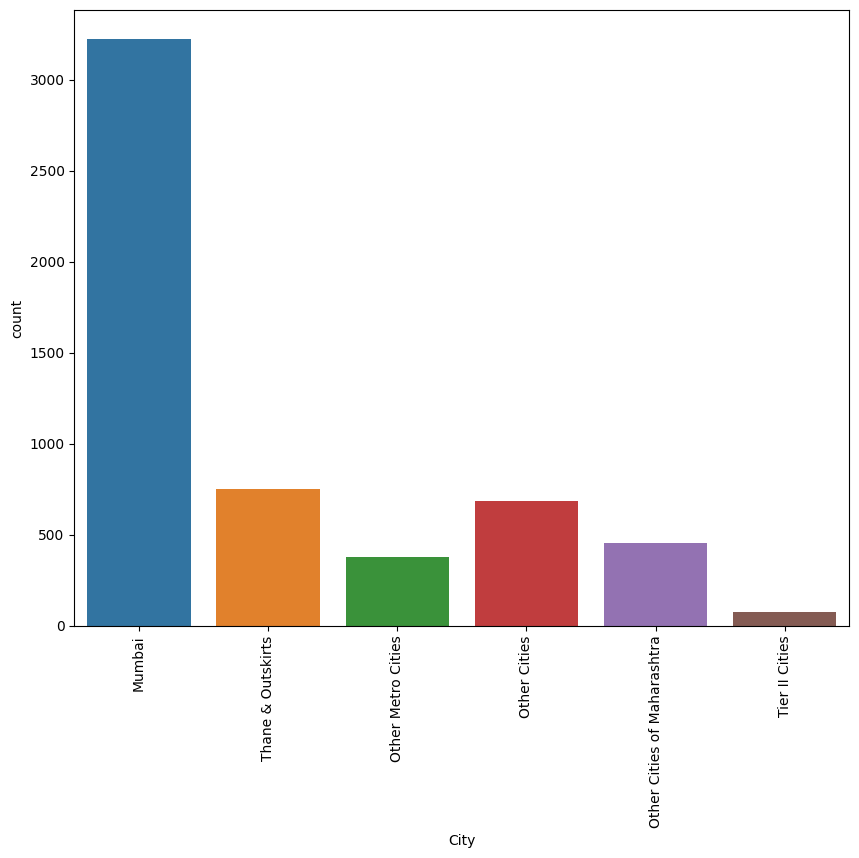

In [30]:

sns.countplot(x = df.City)
fig = plt.gcf()
plt.xticks(rotation=90)

fig.set_size_inches(10,8)

#### most of the customers are from mumbai, let's impute mumbai in null values.

In [31]:
df['City'].fillna('Mumbai', inplace = True)

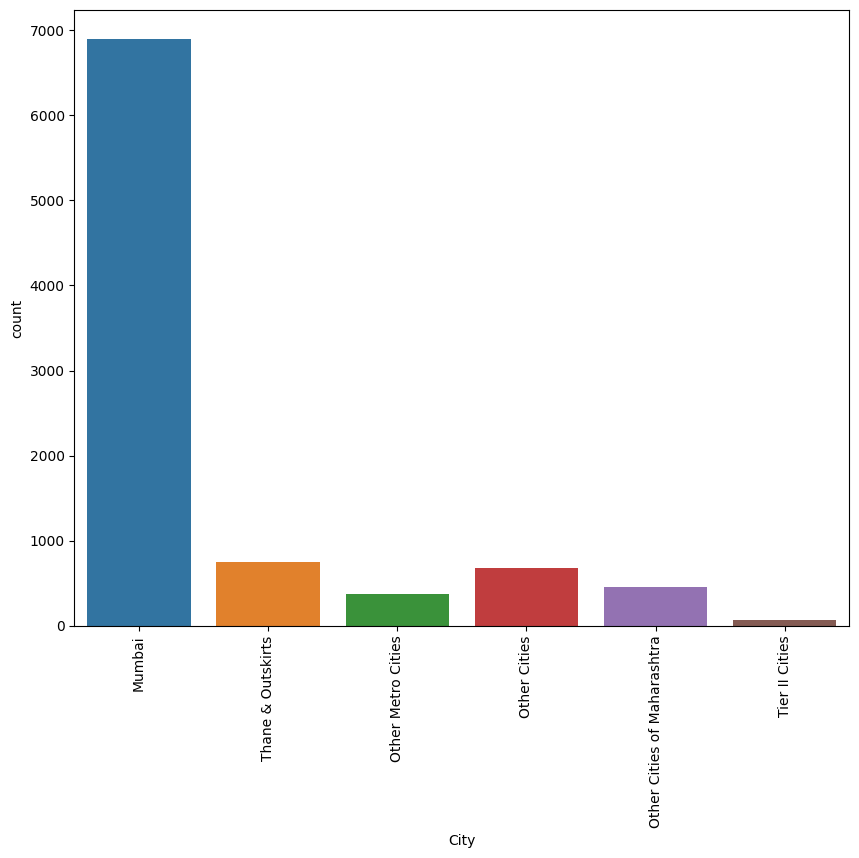

In [32]:

sns.countplot(x = df.City)
fig = plt.gcf()
plt.xticks(rotation=90)

fig.set_size_inches(10,8)


In [33]:
# City is dealt with...next??
df.isnull().mean()[(df.isnull().mean() * 100)>0].sort_values(ascending = False) * 100

Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
dtype: float64

<hr>

##### Specialization

 Specialization	-  'The industry domain in which the customer worked before'
 


In [34]:
df.Specialization.describe()

# yep categorical variable


count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

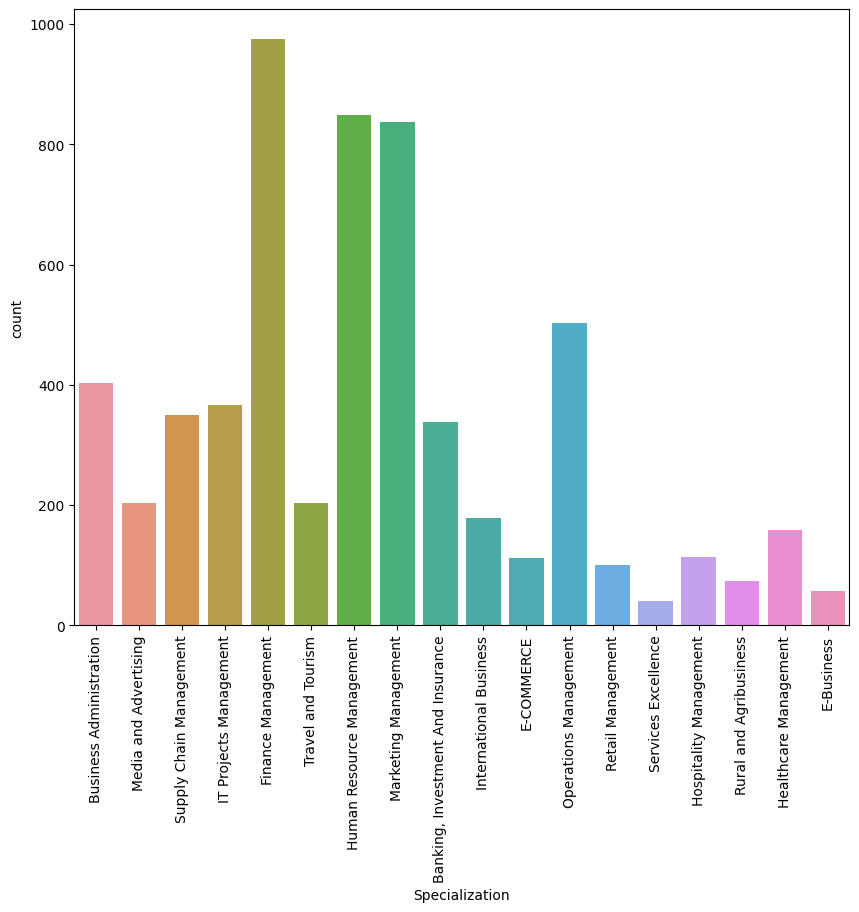

In [35]:
sns.countplot(x = df.Specialization)
fig = plt.gcf()
plt.xticks(rotation=90)

fig.set_size_inches(10,8)


As data dictionary says these specialization are what users have worked before, but what if the user is a student, and there isn't any category for student here. There might be other case as well like user deliberately didnot enter his/her specialization. so it's better to introduce another category than just imputing null values as mode.

#### Let's name this category 'others'

In [36]:
df.Specialization.fillna('Others', inplace = True)

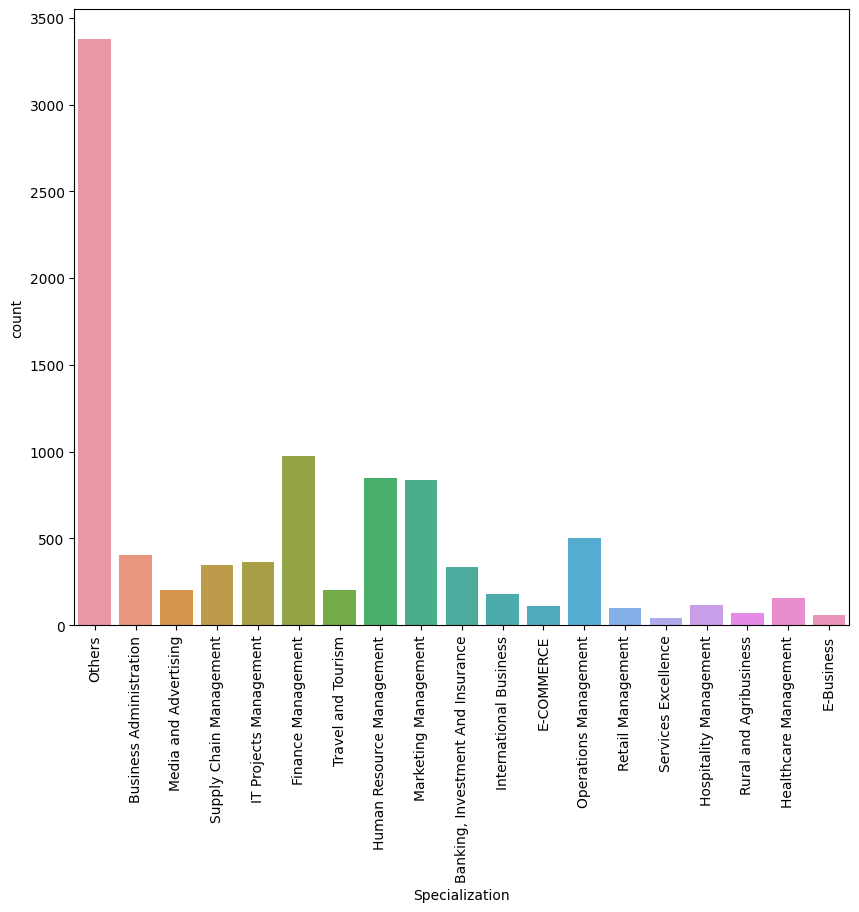

In [37]:
sns.countplot(x = df.Specialization)
fig = plt.gcf()
plt.xticks(rotation=90)

fig.set_size_inches(10,8)


In [38]:
# Specialization done what next??
df.isnull().mean()[(df.isnull().mean() * 100)>0].sort_values(ascending = False) * 100

Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
dtype: float64

##### Tags

Tags -	'Tags assigned to customers indicating the current status of the lead.'


In [39]:
df.Tags.describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

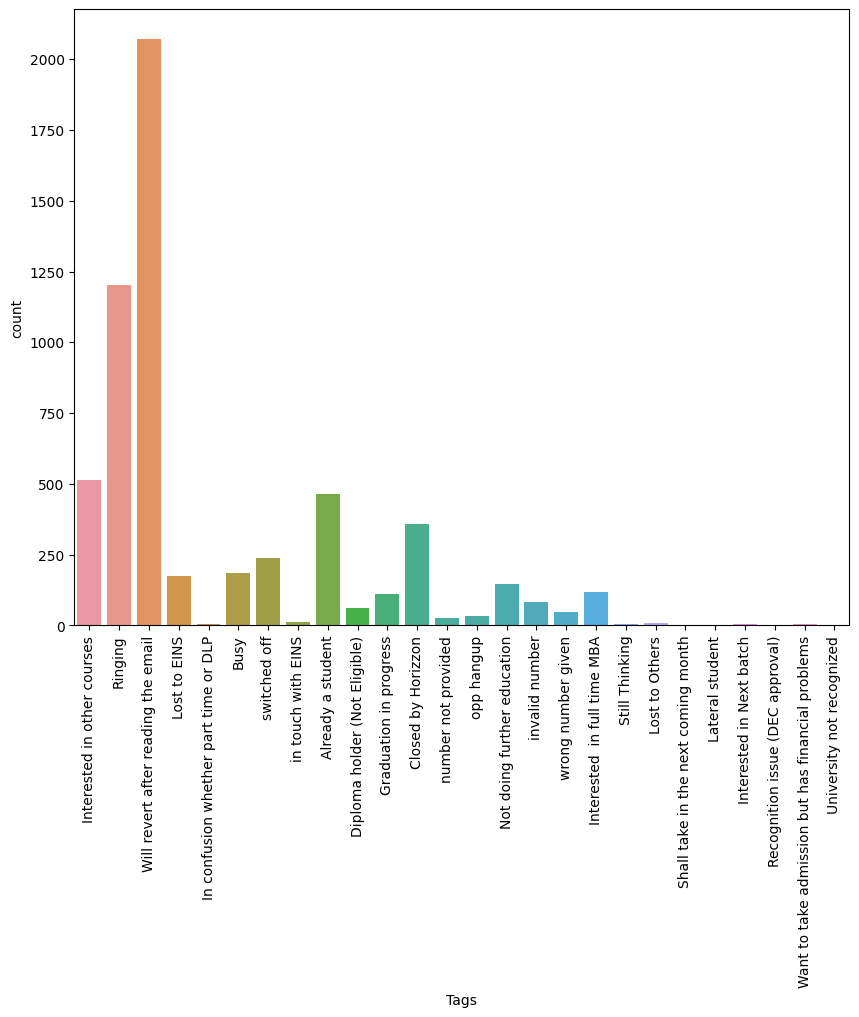

In [40]:
sns.countplot(x = df.Tags)
fig = plt.gcf()
plt.xticks(rotation=90)

fig.set_size_inches(10,8)


Can impute null values with 'will revert after reading the email' as it is mode of this column.


In [41]:

df.Tags.fillna('Will revert after reading the email',inplace = True)

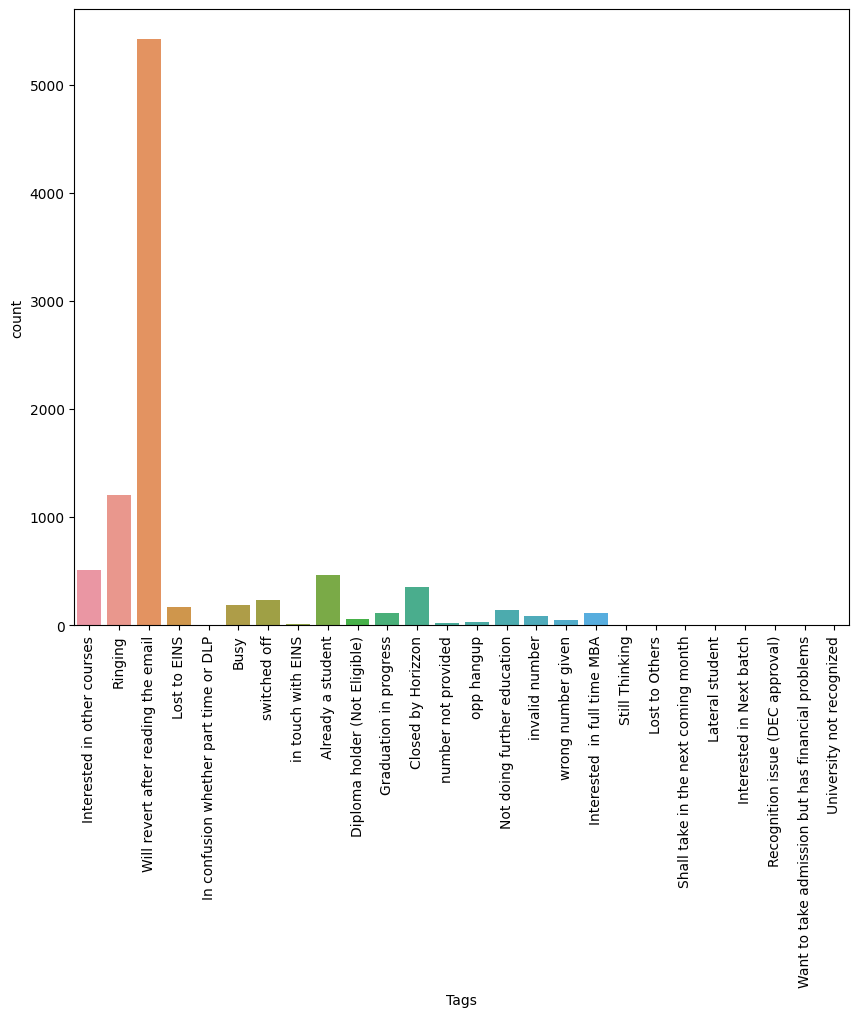

In [42]:
sns.countplot(x = df.Tags)
fig = plt.gcf()
plt.xticks(rotation=90)

fig.set_size_inches(10,8)


In [43]:
# Tags done as well, 
df.isnull().mean()[(df.isnull().mean() * 100)>0].sort_values(ascending = False) * 100

What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
dtype: float64

<hr>

##### What matters most to you in choosing a course

In [44]:
df['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

In [45]:
df['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

Flexibility & Convenience and Others are so low that you cant even consider those two as options..😂😂

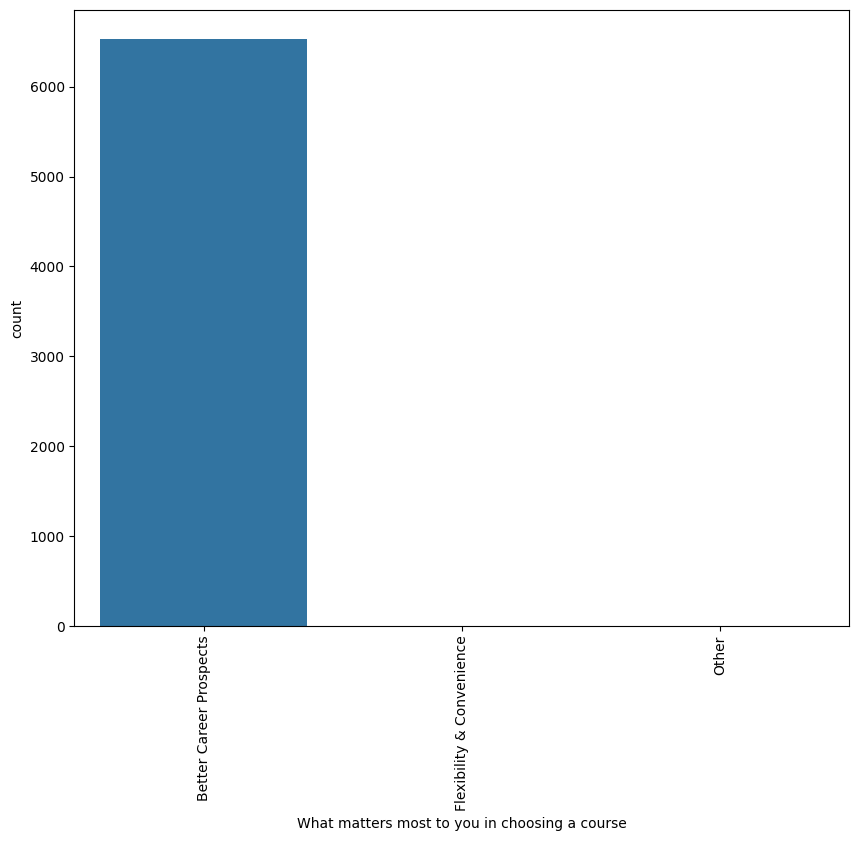

In [46]:
sns.countplot(x = df['What matters most to you in choosing a course'])
fig = plt.gcf()
plt.xticks(rotation=90)

fig.set_size_inches(10,8)


In [47]:
# Better Career Prospects is a better choice to fill null values, 

df['What matters most to you in choosing a course'].fillna('Better Career Prospects', inplace = True)

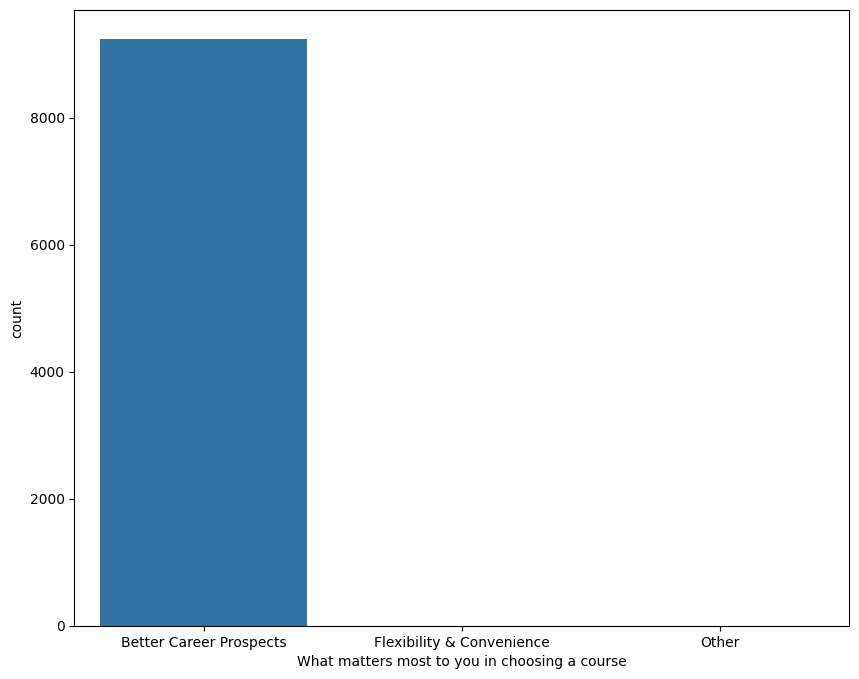

In [48]:
sns.countplot(x = df['What matters most to you in choosing a course'])
fig = plt.gcf()
plt.xticks(rotation=0)

fig.set_size_inches(10,8)


In [49]:
# Next is 'What is your current occupation'
df.isnull().mean()[(df.isnull().mean() * 100)>0].sort_values(ascending = False) * 100

What is your current occupation    29.112554
Country                            26.634199
TotalVisits                         1.482684
Page Views Per Visit                1.482684
Last Activity                       1.114719
Lead Source                         0.389610
dtype: float64

<hr>

##### What is your current occupation

In [50]:
df['What is your current occupation'].describe()


count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

there are 6 unique values, and unemployed seems to be most frequent

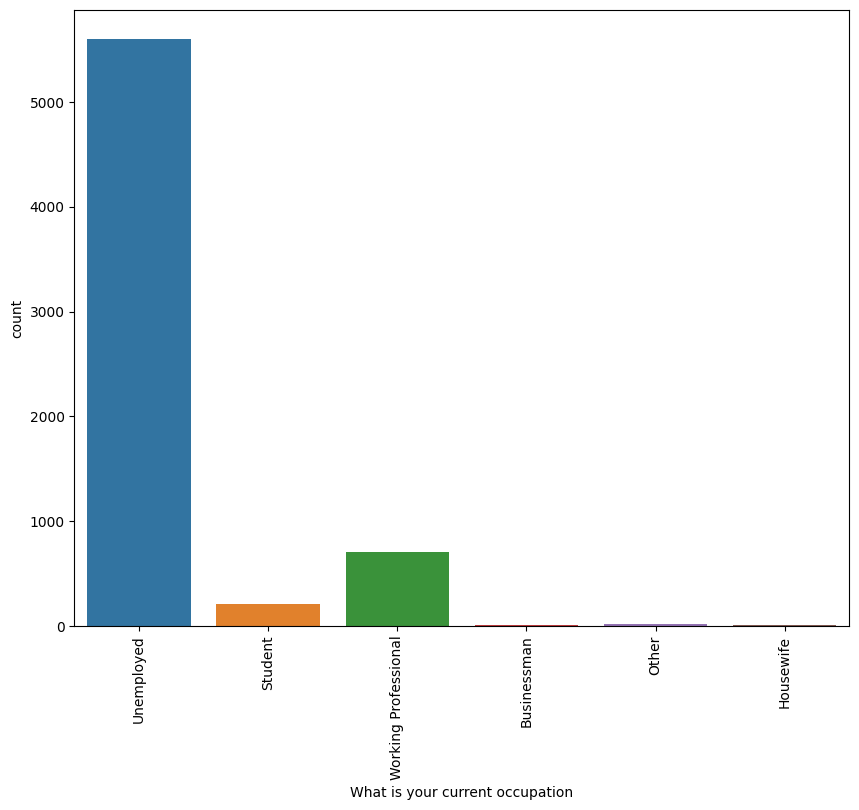

In [51]:
sns.countplot(x = df['What is your current occupation'])
fig = plt.gcf()
plt.xticks(rotation=90)

fig.set_size_inches(10,8)


imputing Unemployed as in place of null seems good, this should work.

In [52]:


df['What is your current occupation'].fillna('Unemployed', inplace = True)

In [53]:
# Next is 'Country'
df.isnull().mean()[(df.isnull().mean() * 100)>0].sort_values(ascending = False) * 100

Country                 26.634199
TotalVisits              1.482684
Page Views Per Visit     1.482684
Last Activity            1.114719
Lead Source              0.389610
dtype: float64

<hr>

##### Country

In [54]:
df.Country.describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

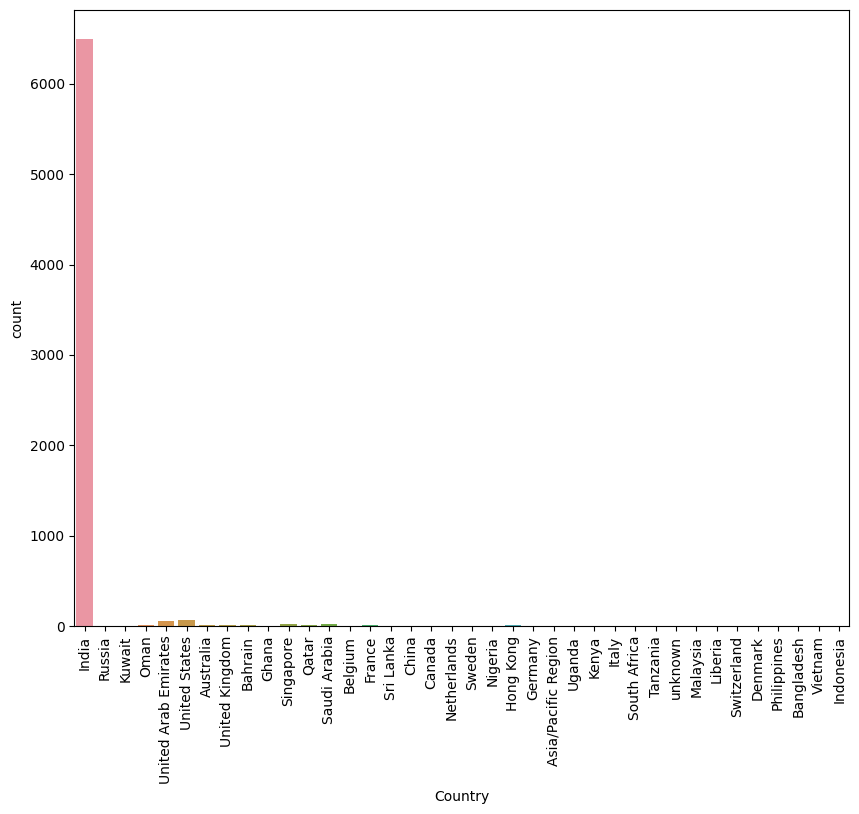

In [55]:
sns.countplot(x = df['Country'])
fig = plt.gcf()
plt.xticks(rotation=90)

fig.set_size_inches(10,8)


Looks like company is far more active in INDIA that's why it most users/leads are from India.


Imputing India in null values


In [56]:

df.Country.fillna('India', inplace = True)


<hr>

In [57]:
df.isnull().mean()[(df.isnull().mean() * 100)>0].sort_values(ascending = False) * 100

TotalVisits             1.482684
Page Views Per Visit    1.482684
Last Activity           1.114719
Lead Source             0.389610
dtype: float64

In [58]:
# Rest coulmns have less than 2% of null values, we can drop these rows. 

df.dropna(inplace = True)

##### After this do we have any null values left.??

In [59]:

df.isnull().mean()[(df.isnull().mean() * 100)>0].sort_values(ascending = False)

Series([], dtype: float64)

##### NO

#### as you can see there are no null values remaining in the dataframe

#### let's make a copy of this dataframe so we have something as a backup if we messup something later. 


In [60]:
data= df.copy()

In [61]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Mumbai,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Mumbai,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,No,Modified


<hr>

## 3. EDA - Exploratory Data Analysis

#### we have 'Converted' as our target variable. what it indicates is whether a lead has been succesfully converted or not, in short conversion rate.

In [62]:
data.Converted.mean() * 100

37.85541106458012

this means we have approximate 38 % of conversion rate for our leads.

### 3.1 Defining custom functions for data visualization

In [63]:
def plot_category(x, rot = False):
    sns.countplot(x = data[x], hue = data['Converted'])
    if rot:
        plt.xticks(rotation=90)
    fig = plt.gcf()
    fig.set_size_inches(10,7)
    
    
def plot_numerical(x, rot = False):
    sns.boxplot(x = data['Converted'],y = data[x])
    if rot:
        plt.xticks(rotation=90)
    fig = plt.gcf()
    fig.set_size_inches(10,7)

    

### 3.2 Variable analysis with respect to Target Variable

##### Lead Origin

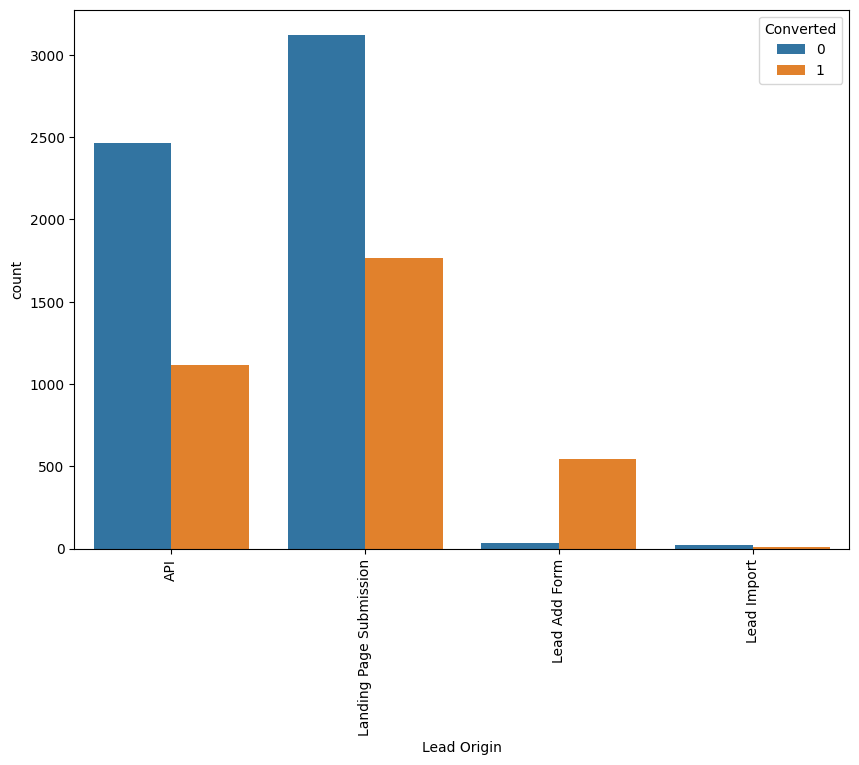

In [64]:
plot_category('Lead Origin', True)

Inference:

    - API and Landing PAge Submission have nearly 30 - 35 % of lead conversion, but count is very high.
    - Lead Add Form have nearly 90% conversion but count is low
    - Lead Import do not have much leads and conversion, it is least of them all

Looks like we need to focus on API and Landing Page Submission to get more leads, and we need to increase count from Lead Add Form.

##### Lead Source


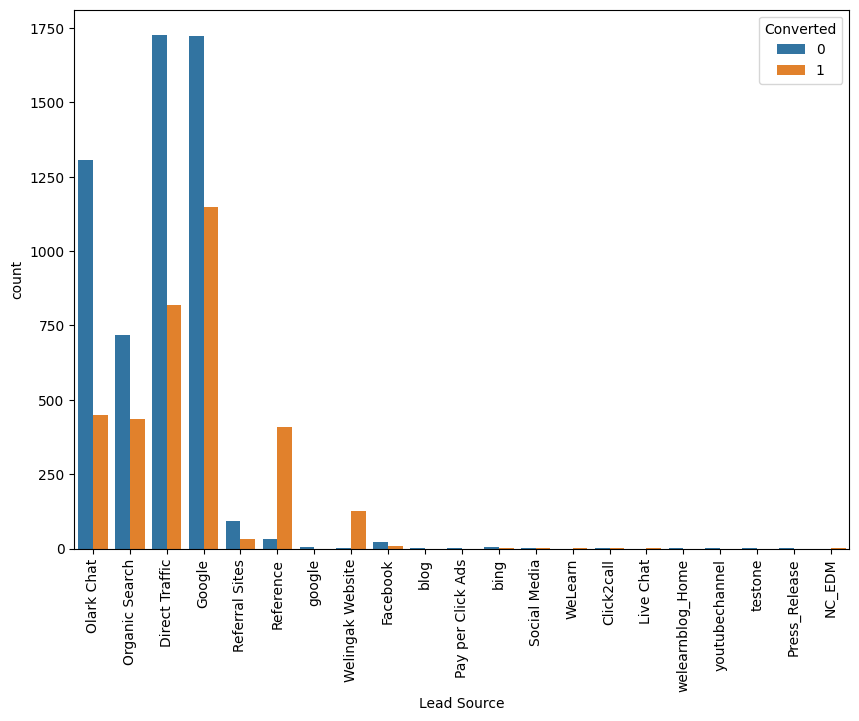

In [65]:
plot_category('Lead Source', True)

  WAit what ??, there are two google here. 
 as we can see many of the categories dont have much values let's combine them and call them as 'other_lead_Sources'



Converting 'google' to 'Google', 


In [66]:
data['Lead Source'].replace('google','Google', inplace = True)

In [67]:
data['Lead Source'].value_counts()

Lead Source
Google               2873
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: count, dtype: int64

Merging all other low bar categories into one

In [68]:

data['Lead Source'].replace(['bing','Click2call','Live Chat',
                             'Social Media','Press_Release',
                             'testone','welearnblog_Home',
                             'WeLearn','blog','Pay per Click Ads',
                             'NC_EDM','youtubechannel'], 'Other_LeadSource', inplace = True)

In [69]:
data['Lead Source'].value_counts()

Lead Source
Google              2873
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Facebook              31
Other_LeadSource      23
Name: count, dtype: int64

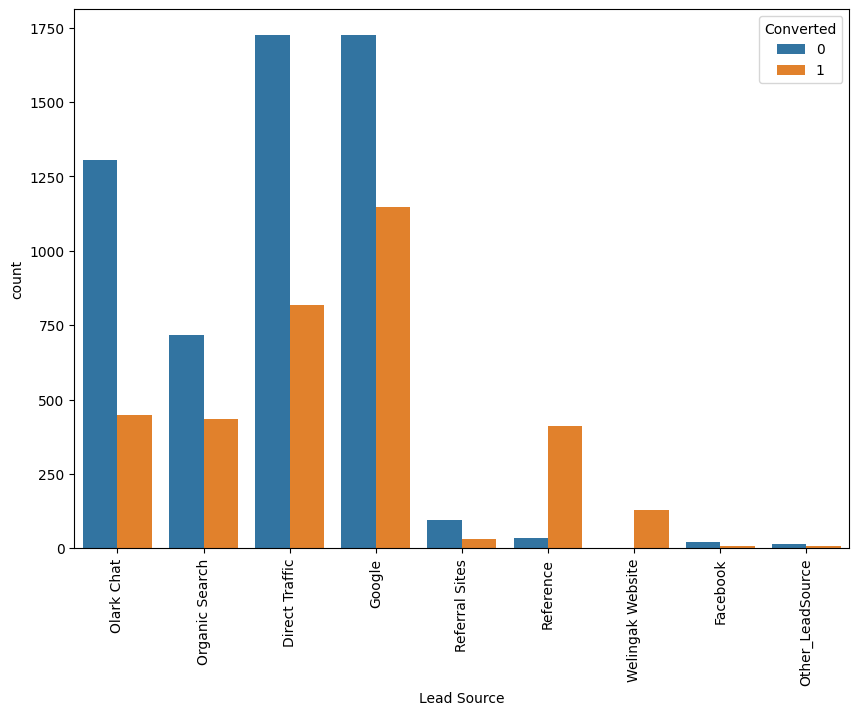

In [70]:
plot_category('Lead Source', True)

Inference:

    - Direct Traffic and Google leads generates maximum number of leads, 
    - Conversion rate of Leads through References and Welingak Website is very high
    
Focusing on Olark Chat, Organic Search, Direct Traffic, Google will Boost lead conversion and we should increase the count of Reference and Welingak Websites, it will be a great benefit.

In [71]:
data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

##### 'Do not Email' & 'Do not Call'

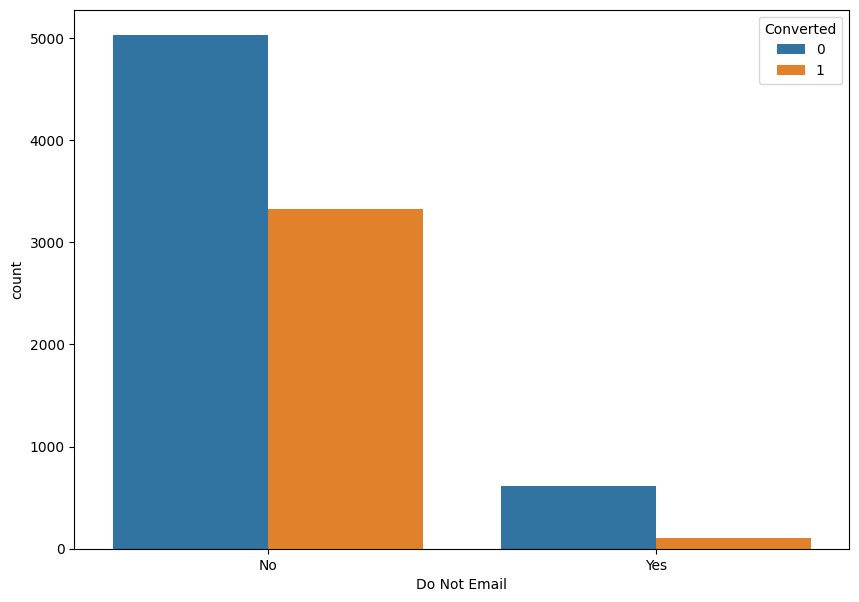

In [72]:
plot_category('Do Not Email')


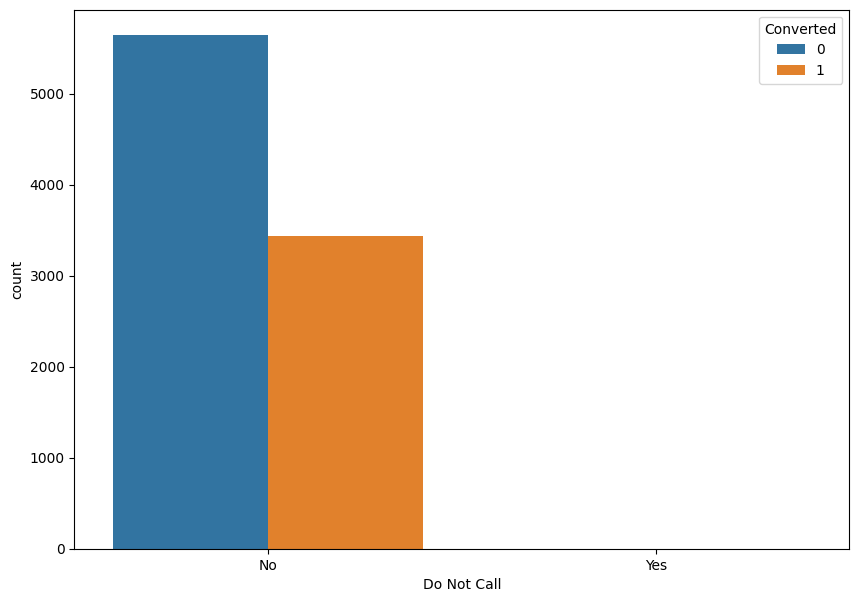

In [73]:
plot_category('Do Not Call')

inference :
Not much to infer about,there is a higher chance for lead who say yes to email and calls to  get converted. 

<hr>

##### Total Visits


In [74]:
data['TotalVisits'].describe([0.05, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

we can clearly see outliers here


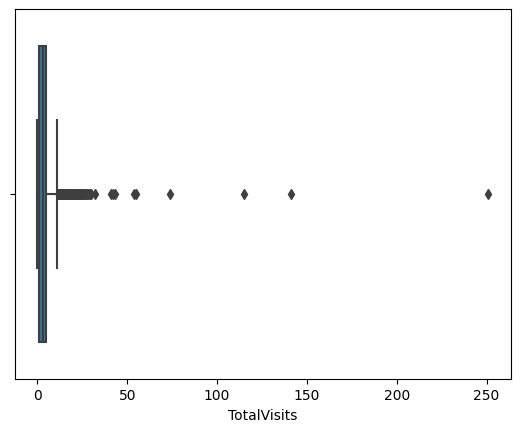

In [75]:
sns.boxplot(x =data['TotalVisits'])
plt.show()

In [76]:
quantiles = data['TotalVisits'].quantile([0.05,0.95]).values

data.loc[data['TotalVisits'] <= quantiles[0], 'TotalVisits'] = quantiles[0]
data.loc[data['TotalVisits'] >= quantiles[1], 'TotalVisits'] = quantiles[1]


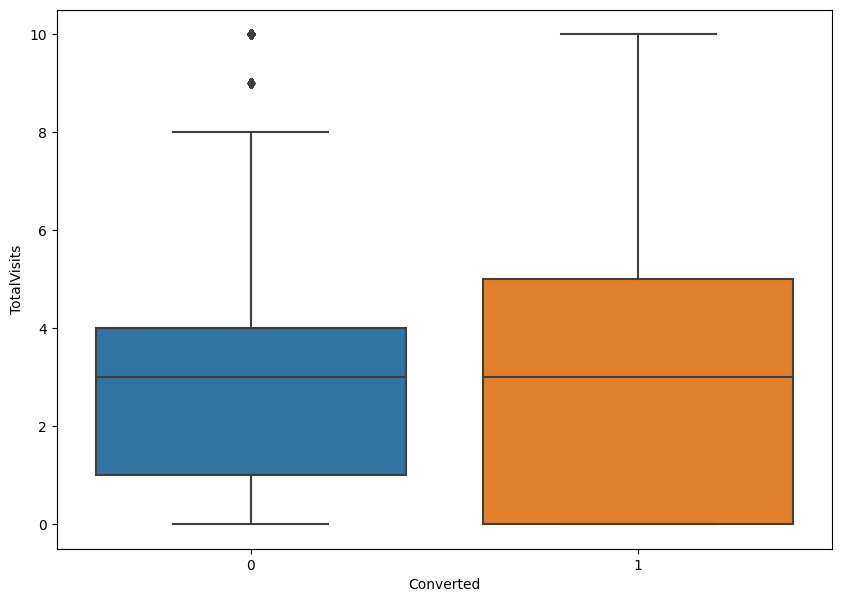

In [77]:
plot_numerical('TotalVisits')

Median is same for both converted and not converted leads. but interquantile range is more for converted leads than not converted leads.

Inference : cannot conclude anything solid here.

<hr>

##### Total Time Spent on website

In [78]:
data['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

<AxesSubplot:xlabel='Total Time Spent on Website'>

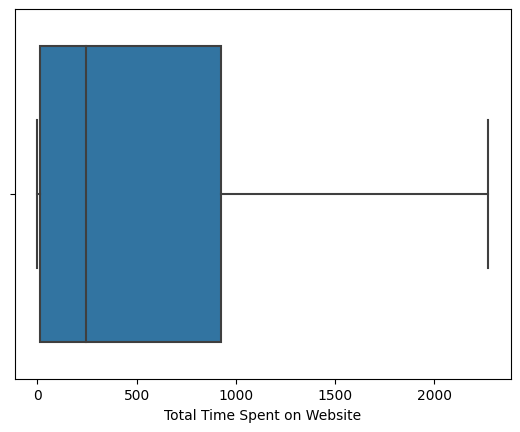

In [79]:
sns.boxplot(x = data['Total Time Spent on Website'])

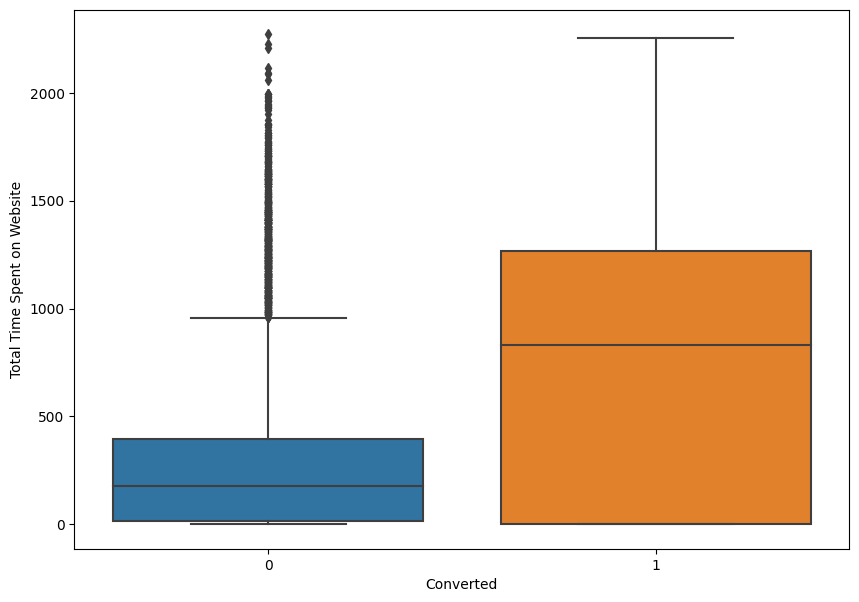

In [80]:
plot_numerical('Total Time Spent on Website')


inference:

    -So this tells that more time a lead spend on website more likely it is to convert. company should focus on their website UI/UX as well I think and try to make website more engaging.

<hr>

##### Page Views per Visit

In [81]:
data['Page Views Per Visit'].describe([0.05, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.200000
90%         5.000000
95%         6.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

We got an outlier, this is making things complex. Let's cap values


In [82]:
quantiles = data['Page Views Per Visit'].quantile([0.05,0.95]).values

data.loc[data['Page Views Per Visit'] <= quantiles[0], 'Page Views Per Visit'] = quantiles[0]
data.loc[data['Page Views Per Visit'] >= quantiles[1], 'Page Views Per Visit'] = quantiles[1]


<AxesSubplot:xlabel='Page Views Per Visit'>

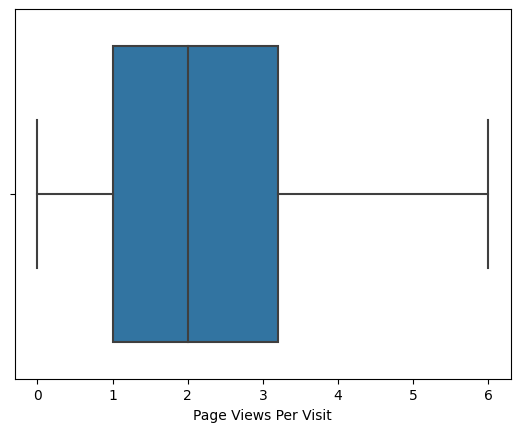

In [83]:
sns.boxplot(x = data['Page Views Per Visit'])

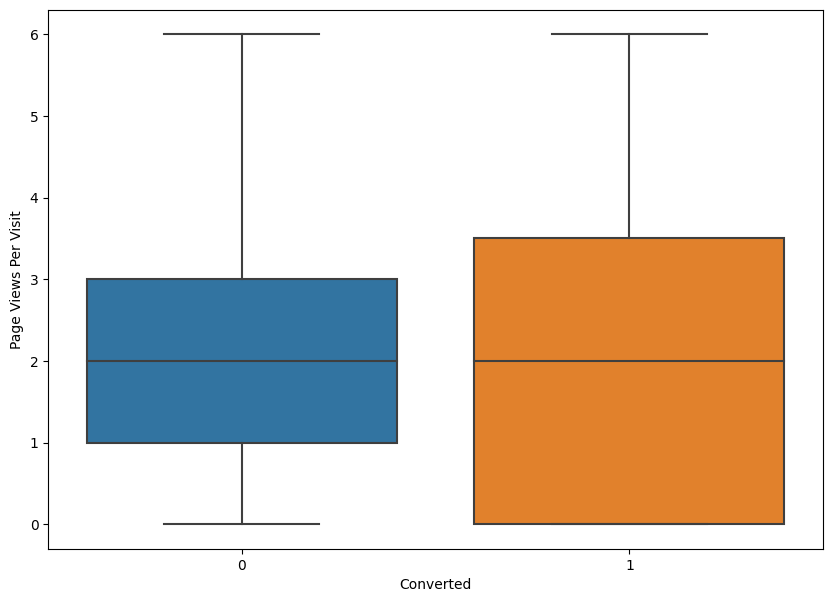

In [84]:
plot_numerical('Page Views Per Visit')

Inference: The median is about same but can not draw much inference from the plot.

<hr>

##### Last Activity

In [85]:
data['Last Activity'].describe()

count             9074
unique              17
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

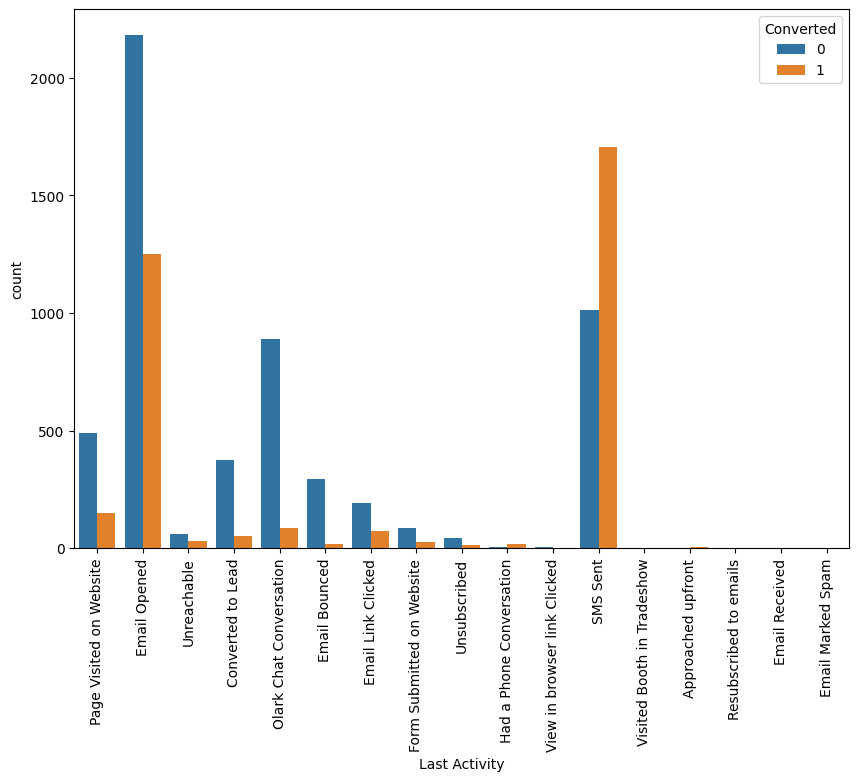

In [86]:
plot_category('Last Activity', True)

there are alot of category which doesn't count much, should club them all.


In [87]:
data['Last Activity'].value_counts()

Last Activity
Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

clubbing - 
[View in browser link Clicked,Approached upfront,Email Received,Email Marked Spam,Resubscribed to emails,Visited Booth in Tradeshow ] 

In [88]:
# CLubbing all single count categories 
data['Last Activity'].replace(['View in browser link Clicked',
                               'Approached upfront',
                               'Email Received',
                               'Email Marked Spam',
                               'Resubscribed to emails',
                               'Visited Booth in Tradeshow'], 'Other_Activity', inplace = True)

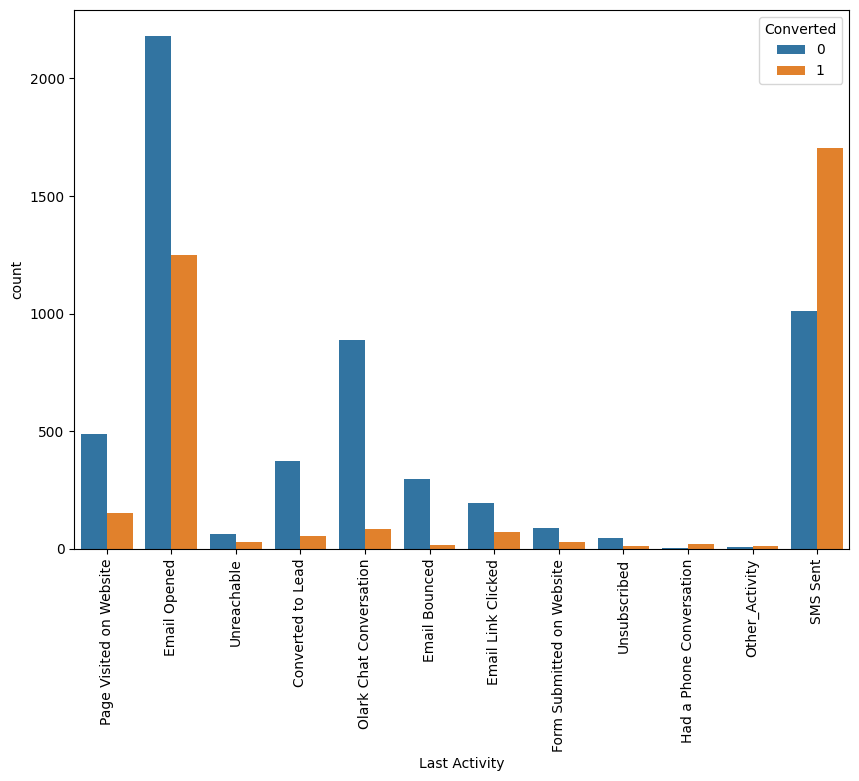

In [89]:
plot_category('Last Activity', True)

inference :

    - Most of the leads have opened their Emails, and nearly 30% of them converted as well.
    - SMS sent leads have almost 60% lead conversion rate. 

focusing on these two type of leads is important as it is critical point for leads to convert.

<hr>

##### Country

In [90]:
data['Country'].describe()

count      9074
unique       38
top       India
freq       8787
Name: Country, dtype: object

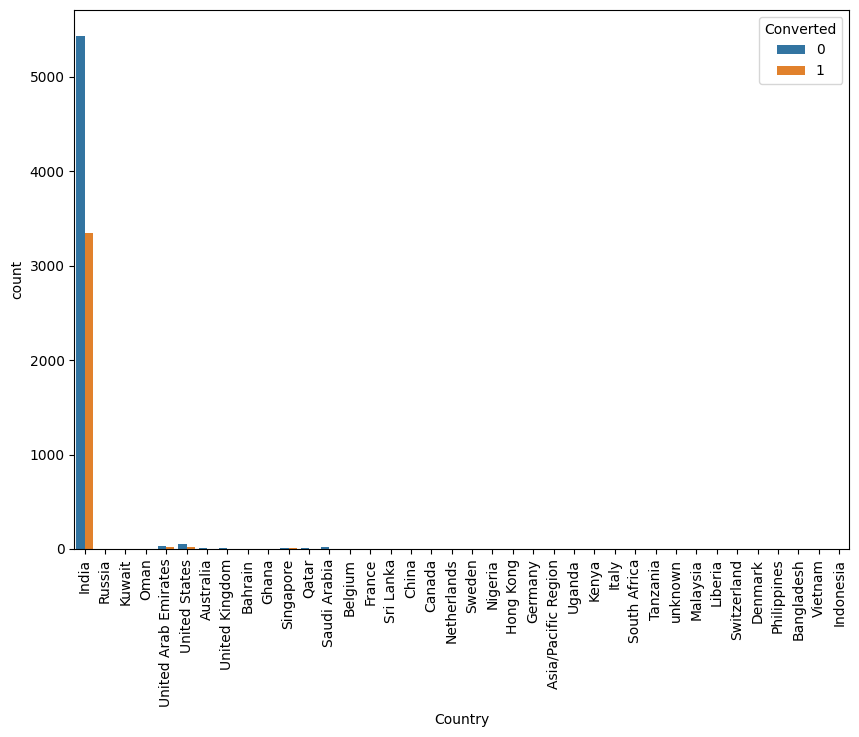

In [91]:
plot_category('Country', True)

inference:
    
    -Almost all leads are from India, not much can be inference can be taken from here.

<hr>

##### Specialization

In [92]:
data['Specialization'].describe()

count       9074
unique        19
top       Others
freq        3282
Name: Specialization, dtype: object

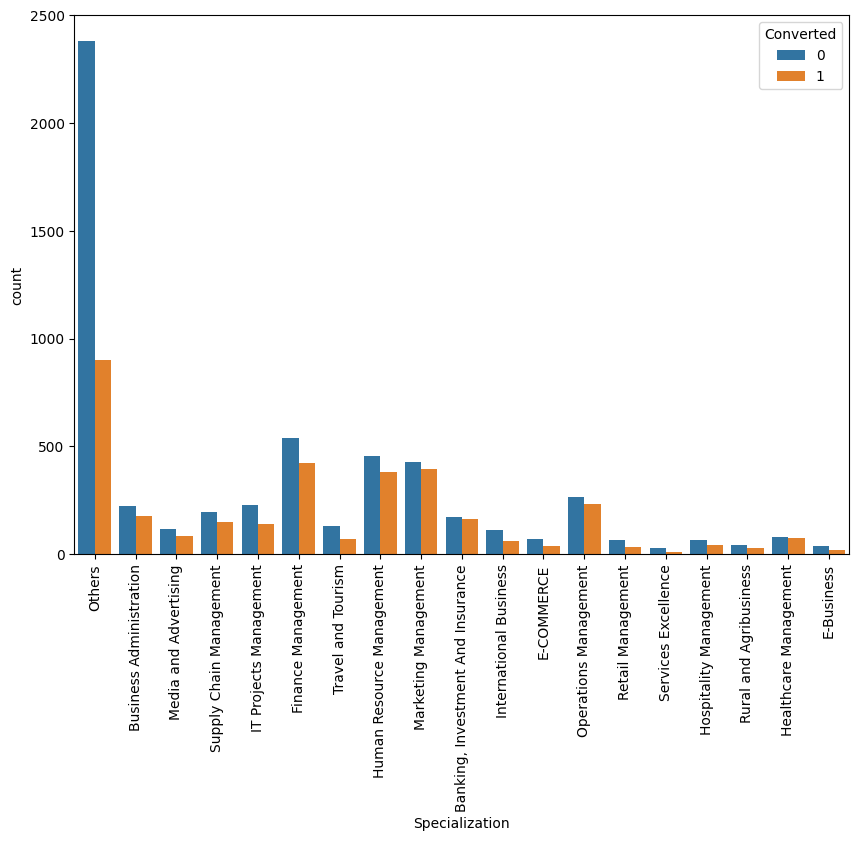

In [93]:
plot_category('Specialization', True)

inference:

- Others are those leads who did not specify there specialisation, their conversion rate is approx 20%
- Should focus on leads with high conversion rate where specialisation is specified.
- Finance Management, H R Management, Marketing Management, Operations management are specialization where company can focus

<hr>

##### Occupation

Changing long name to short --> 'What is your current occupation'-to-'Occupation'

In [94]:
data.rename(columns={'What is your current occupation':'Occupation'},  inplace = True)


In [95]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,Occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Mumbai,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Mumbai,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,No,Modified


In [96]:
data['Occupation'].describe()

count           9074
unique             6
top       Unemployed
freq            8159
Name: Occupation, dtype: object

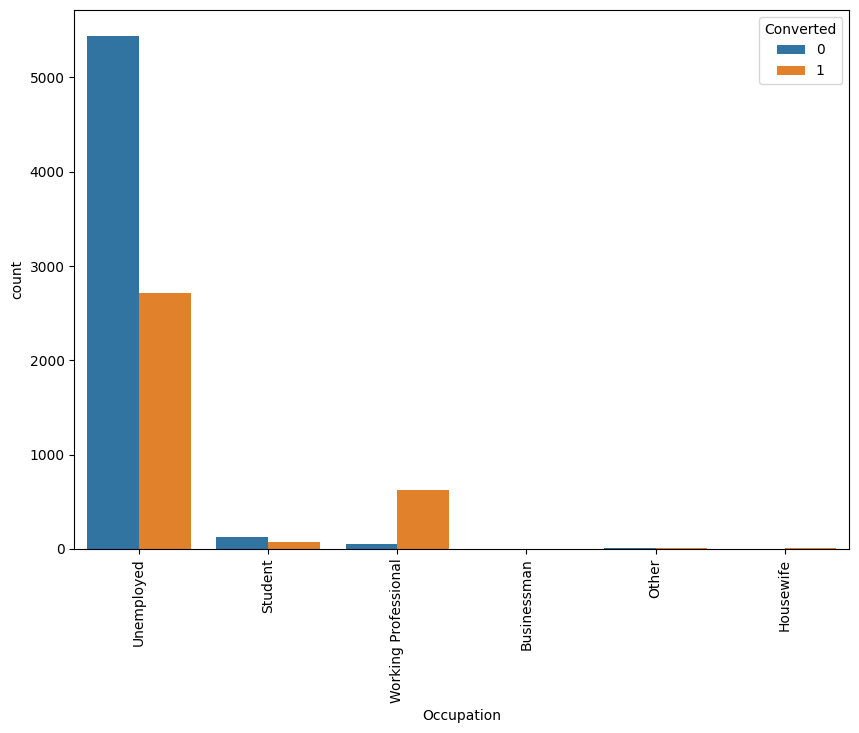

In [97]:
plot_category('Occupation', True)

Inference:

- Working professionals have highest chance of getting converted. Their conversion rate is more than 90%. 
- Unemployed leads have most count but their conversion rate is among 30-35%.

<hr>

##### What Matters To you in choosing the course

In [98]:
data['What matters most to you in choosing a course'].describe()


count                        9074
unique                          3
top       Better Career Prospects
freq                         9072
Name: What matters most to you in choosing a course, dtype: object

Inference:
- Three unique values and all almost values are of a single type, not much inference can be drawn.

<hr>

##### Search

In [99]:
data['Search'].describe()

count     9074
unique       2
top         No
freq      9060
Name: Search, dtype: object

Inference :
- Most values are 'No' not much inference can be drawn out.

<hr>

##### Magazine



In [100]:
data['Magazine'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Magazine, dtype: object

Inference :
- All values are 'No' not much inference can be drawn out.


<hr>

##### NewsPaper Article

In [101]:
data['Newspaper Article'].describe()

count     9074
unique       2
top         No
freq      9072
Name: Newspaper Article, dtype: object

Inference :
- Most values are 'No' not much inference can be drawn out.

<hr>

##### X Education Forums

In [102]:
data['X Education Forums'].describe()

count     9074
unique       2
top         No
freq      9073
Name: X Education Forums, dtype: object

Inference :
- Most values are 'No' not much inference can be drawn out.

<hr>

##### NewsPaper

In [103]:
data['Newspaper'].describe()

count     9074
unique       2
top         No
freq      9073
Name: Newspaper, dtype: object

Inference :
- Most values are 'No' not much inference can be drawn out.

<hr>

##### Digital Advertisement

In [104]:
data['Digital Advertisement'].describe()

count     9074
unique       2
top         No
freq      9070
Name: Digital Advertisement, dtype: object

Inference :
- Most values are 'No' not much inference can be drawn out.

<hr>

##### Through Recommendation

In [105]:
data['Through Recommendations'].describe()

count     9074
unique       2
top         No
freq      9067
Name: Through Recommendations, dtype: object

Inference :
- Most values are 'No' not much inference can be drawn out.




<hr>

##### Receive More Updates About Our Courses


In [106]:
data['Receive More Updates About Our Courses'].describe()


count     9074
unique       1
top         No
freq      9074
Name: Receive More Updates About Our Courses, dtype: object

Inference :
- All values are 'No' not much inference can be drawn out.

##### Tags

In [107]:
data['Tags'].describe()

count                                    9074
unique                                     26
top       Will revert after reading the email
freq                                     5343
Name: Tags, dtype: object

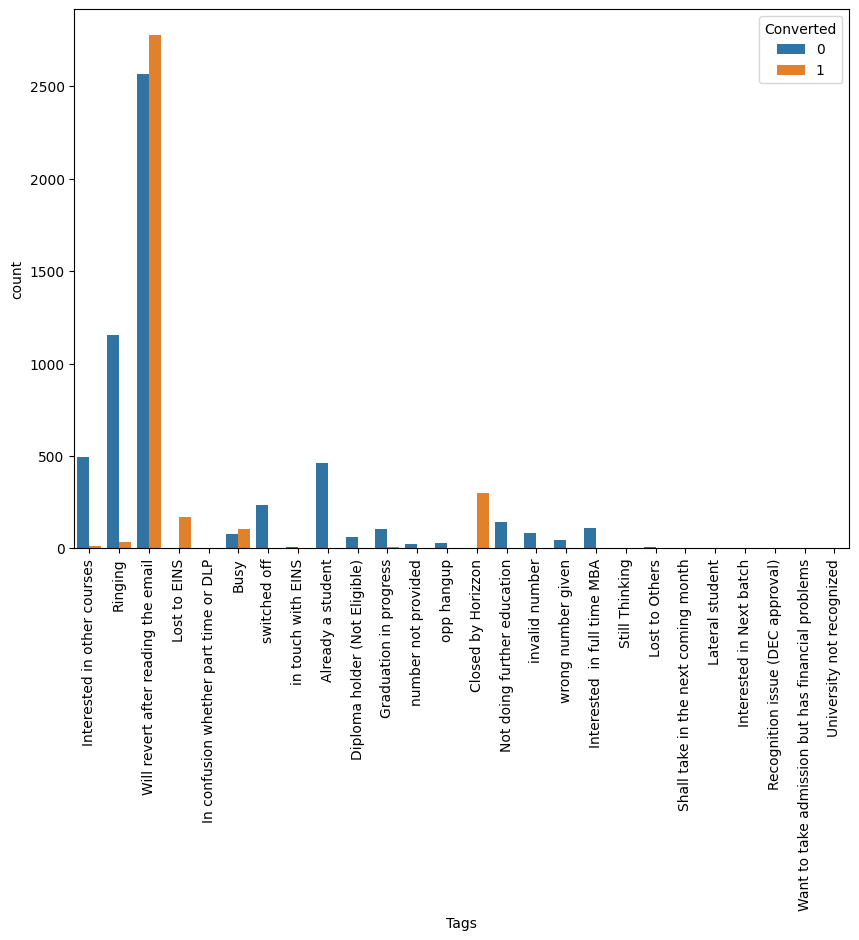

In [108]:
plot_category('Tags', True)

In [109]:
data['Tags'].value_counts()

Tags
Will revert after reading the email                  5343
Ringing                                              1187
Interested in other courses                           509
Already a student                                     465
Closed by Horizzon                                    301
switched off                                          240
Busy                                                  185
Lost to EINS                                          172
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    25
in touch with EINS                                     12
Lost to O

In [110]:
# Let's club all categories having count less than 100

data['Tags'].replace(['invalid number',
                        'Diploma holder (Not Eligible)',
                        'wrong number given',
                        'opp hangup',
                        'number not provided',
                        'in touch with EINS',
                        'Lost to Others',
                        'Want to take admission but has financial problems',
                        'Still Thinking',
                        'Interested in Next batch',
                        'In confusion whether part time or DLP',
                        'Lateral student',
                        'University not recognized',
                        'Shall take in the next coming month',
                        'Recognition issue (DEC approval)'],  'Other_Tags', inplace = True)

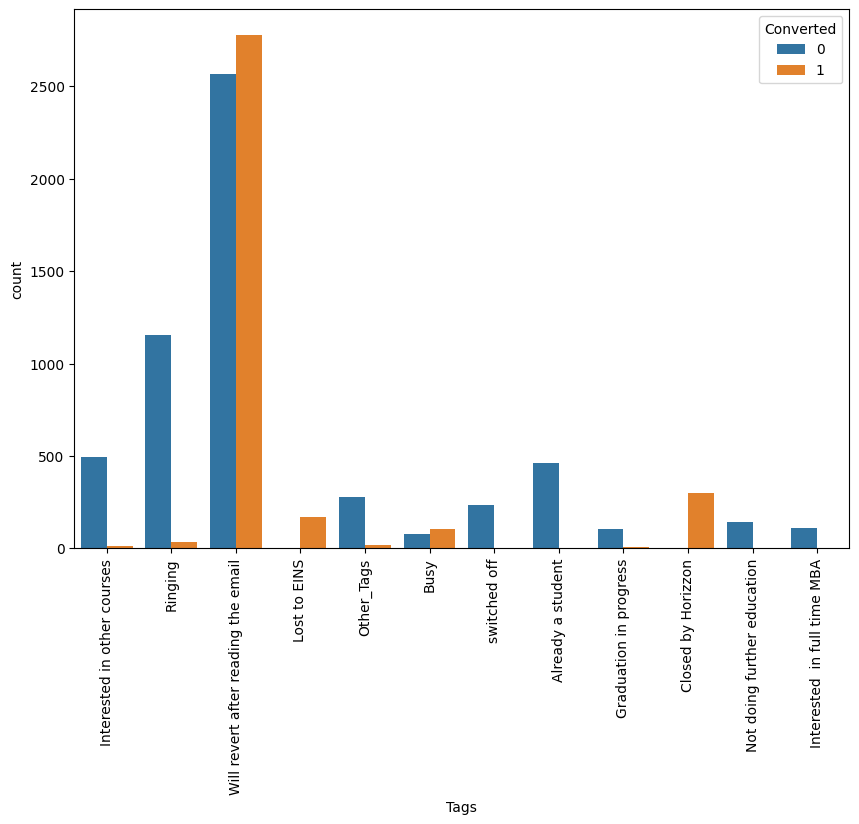

In [111]:
plot_category('Tags', True)

inference:

- leads have more chances to convert if tag is 'will revert after reading email'. This type of leads have more than 50% of conversion rate.
- Lost to EINS, Busy, Closed by Horizon have high conversion rates but low count.
   
Focusing on leads with tag 'will revert after reading email' will result in more lead conversion. Should try to increase count of other high conversion tags.


<hr>

##### Lead Quality

In [112]:
data['Lead Quality'].describe()

count         9074
unique           5
top       Not Sure
freq          5806
Name: Lead Quality, dtype: object

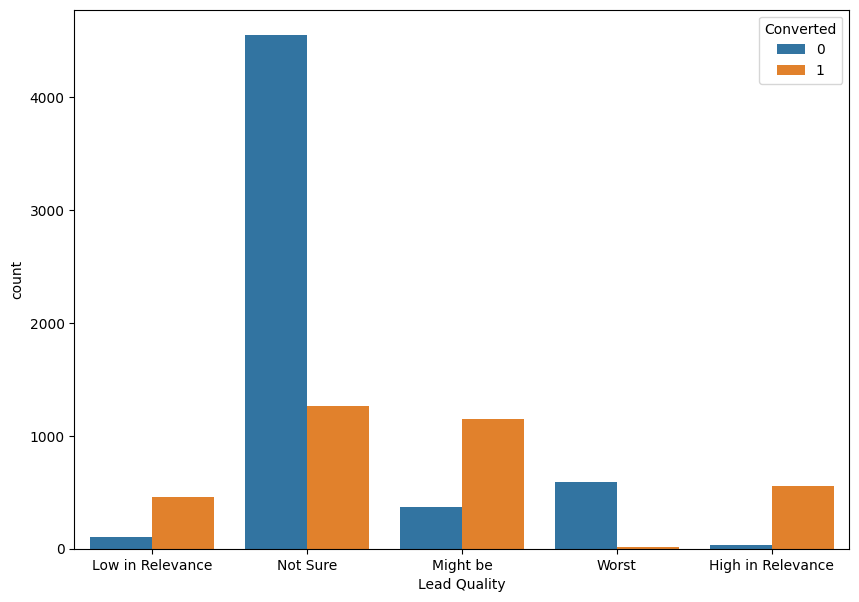

In [113]:

plot_category('Lead Quality')

inference:
- As expected Not sure have high count but low conversion rate. and worst have lowest conversion rate.
- High in relevance have highest conversion rate, followed by Low in relevance and might be

when lead quality is in relevance, it is highly likely to convert lead.

<hr>

##### Update me on Supply Chain Content

In [114]:
data['Update me on Supply Chain Content'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Update me on Supply Chain Content, dtype: object

Inference :
- All values are 'No' not much inference can be drawn out.

l

<hr>

##### Get updates on DM Content

In [115]:
data['Get updates on DM Content'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Get updates on DM Content, dtype: object

Inference :
- All values are 'No' not much inference can be drawn out.

l

<hr>

##### I agree to pay the amount through cheque

In [116]:
data['I agree to pay the amount through cheque'].describe()

count     9074
unique       1
top         No
freq      9074
Name: I agree to pay the amount through cheque, dtype: object

Inference :
- All values are 'No' not much inference can be drawn out.

l

<hr>

##### A free copy of Mastering The Interview

In [117]:
data['A free copy of Mastering The Interview'].describe()

count     9074
unique       2
top         No
freq      6186
Name: A free copy of Mastering The Interview, dtype: object

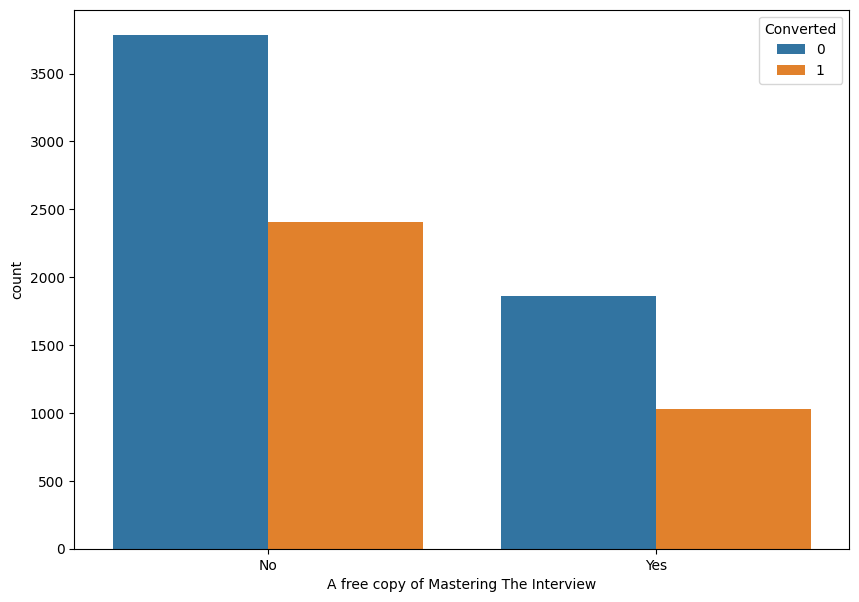

In [118]:
plot_category('A free copy of Mastering The Interview')

inference:

    - There is similar variation in both cases (Yes and no) Cannot infer much from the plot

<hr>

##### City

In [119]:
data.City.describe()

count       9074
unique         6
top       Mumbai
freq        6752
Name: City, dtype: object

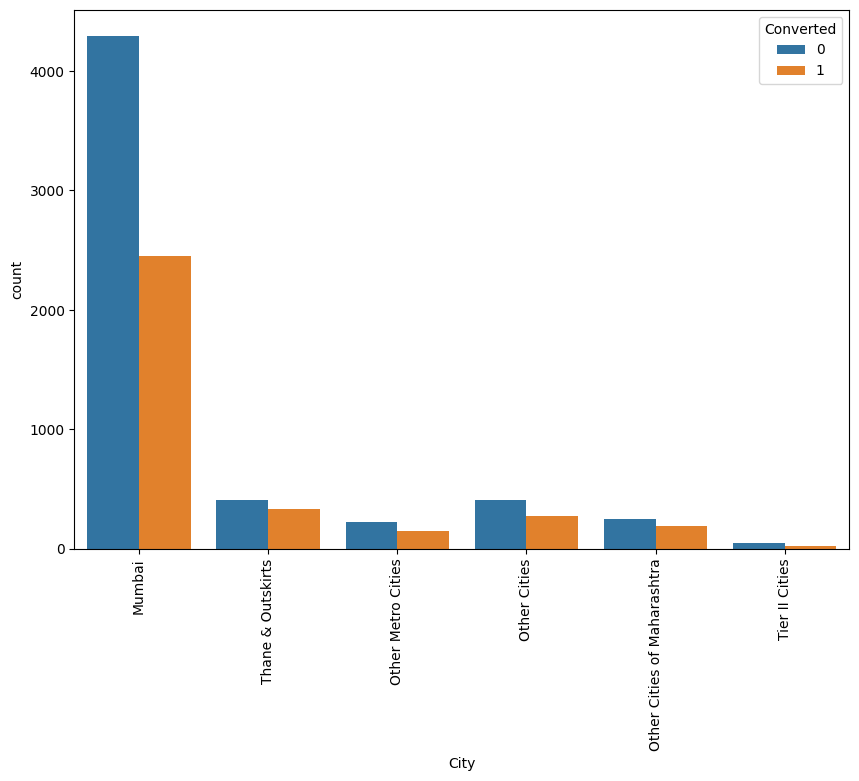

In [120]:
plot_category('City', True)

inference:
    
    - most of the leads are from mumbai, and with around 30 - 35% conversion rate.
    

<hr>

##### Last Notable Activity

In [121]:
data['Last Notable Activity'].describe()

count         9074
unique          16
top       Modified
freq          3267
Name: Last Notable Activity, dtype: object

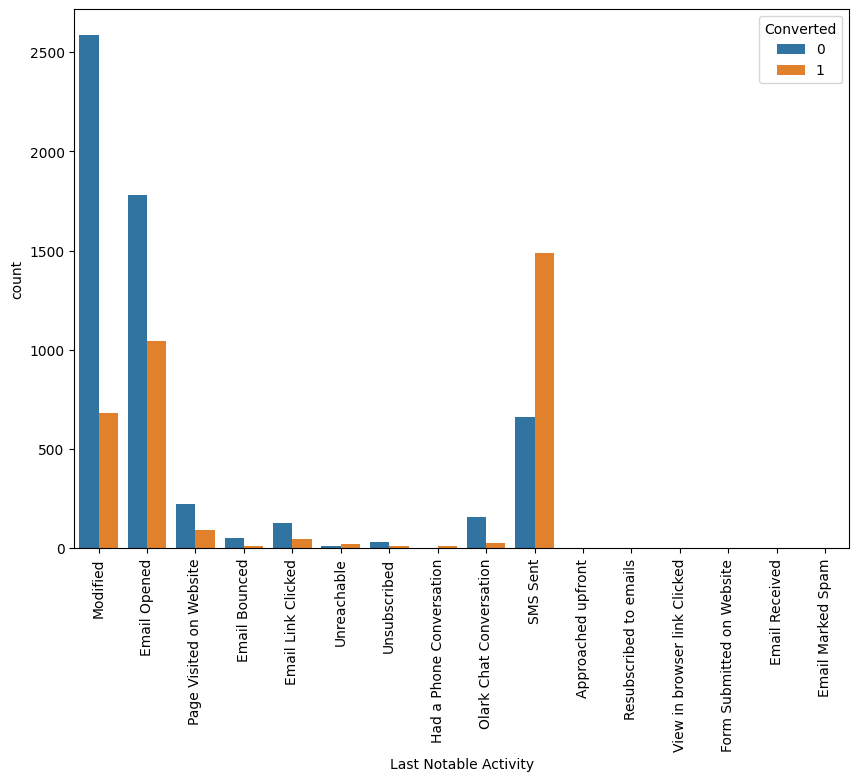

In [122]:
plot_category('Last Notable Activity', True)

inference:
    
- leads where SMS is sent have highest chance of conversion, with conversion rate of aroud 70%.


<hr>

### 3.3 Dropping unnecessary columns

- As we can see some of the columns are not adding value to the data set. Might as well drop them.

In [123]:
# Dropping unwanted columns
data = data.drop(['Lead Number','What matters most to you in choosing a course',
                  'Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
               'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                  'Update me on Supply Chain Content','Get updates on DM Content',
                  'I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country'],axis = 1)

In [124]:
data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Occupation,Tags,Lead Quality,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


The data we have consists of two categories - 
1. Form generated data 
2. Sales team generated.

This means that data is being updated after sales team start approaching leads. As we know our aim is to build a model to find leads that can convert into sales. So we have to neglect all the feature variables introduced by sales team.

those features are - [tags, Lead Quality, Last Activity, Last Notable Activity, Lead Profile, Asymmetric Activity Index, Asymmetric profile Index, Asymmetric Activity Score, Asymmetric Profile Score ]

as you can see we already have dropped some of the columns from data set. 
Time to get rid of remaining as well.
[Tags, Lead Quality, Last Activity, Last Notable Activity]

In [125]:
data = data.drop(['Tags','Last Activity', 'Last Notable Activity'],axis = 1)

In [126]:
data.shape

(9074, 13)

In [127]:
# Let's prepare data for modelling.

#### Converting Binary Variables - 'yes'/'no' to '1'/'0'    

In [128]:


Binary_variables = ['Do Not Call','Do Not Email']


In [129]:
def BinaryMapping(x):
    return x.map({'Yes': 1, "No": 0})


data.loc[:,Binary_variables]=data.loc[:,Binary_variables].apply(BinaryMapping)

In [130]:
data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,Occupation,Lead Quality,City
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Others,Unemployed,Low in Relevance,Mumbai
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Others,Unemployed,Not Sure,Mumbai
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Business Administration,Student,Might be,Mumbai
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Media and Advertising,Unemployed,Not Sure,Mumbai
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Others,Unemployed,Might be,Mumbai


In [131]:
data_num=data[['Do Not Email','Do Not Call','Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

<AxesSubplot:>

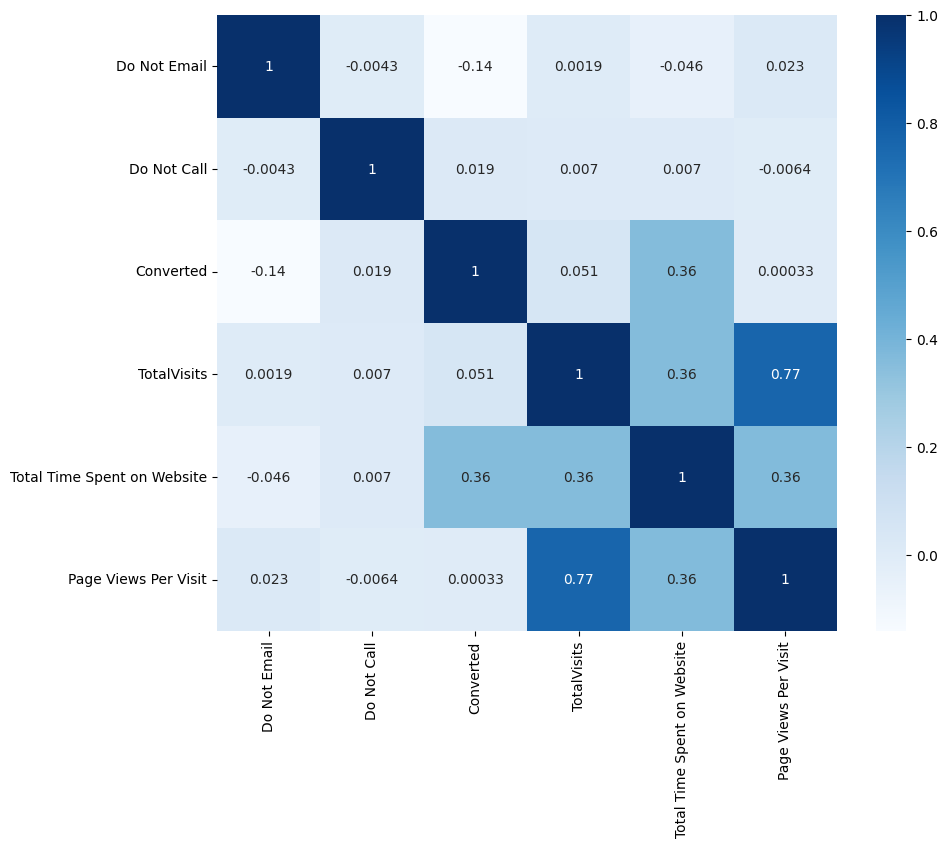

In [132]:
plt.figure(figsize=(10,8))
sns.heatmap(data_num.corr(), annot = True, cmap='Blues')

## 4. Dummy Variable creating from category variables for model generation

In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Prospect ID                  9074 non-null   object 
 1   Lead Origin                  9074 non-null   object 
 2   Lead Source                  9074 non-null   object 
 3   Do Not Email                 9074 non-null   object 
 4   Do Not Call                  9074 non-null   object 
 5   Converted                    9074 non-null   int64  
 6   TotalVisits                  9074 non-null   float64
 7   Total Time Spent on Website  9074 non-null   int64  
 8   Page Views Per Visit         9074 non-null   float64
 9   Specialization               9074 non-null   object 
 10  Occupation                   9074 non-null   object 
 11  Lead Quality                 9074 non-null   object 
 12  City                         9074 non-null   object 
dtypes: float64(2), int64(2)

##### using pandas get_dummies function

In [134]:
category_var = ['Lead Origin', 'Lead Source',
 'Specialization','Occupation',
 'Lead Quality','City']

In [135]:
dummy_vars = pd.get_dummies(data[category_var], drop_first=True)
dummy_vars.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_LeadSource,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False
4,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False


##### Adding data with dummy variables.

In [136]:


data = pd.concat([data, dummy_vars], axis=1)
data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,Occupation,Lead Quality,City,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_LeadSource,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Others,Unemployed,Low in Relevance,Mumbai,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Others,Unemployed,Not Sure,Mumbai,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Business Administration,Student,Might be,Mumbai,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Media and Advertising,Unemployed,Not Sure,Mumbai,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Others,Unemployed,Might be,Mumbai,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False


##### Let's drop original category variables now

In [137]:

data.drop(category_var, axis = 1, inplace = True)

In [138]:
data.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_LeadSource,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False


#### Prospect ID is a redundant variable as well, it may not be use full in further analysis. Dropping it may be a good idea.

In [139]:
data.drop('Prospect ID', axis = 1, inplace = True)

In [140]:
data.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_LeadSource,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0,0.0,0,0.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False
1,0,0,0,5.0,674,2.5,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False
2,0,0,1,2.0,1532,2.0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False
3,0,0,0,1.0,305,1.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False
4,0,0,1,2.0,1428,1.0,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False


## 5. Train - Test Split

##### importing library

In [141]:
from sklearn.model_selection import train_test_split

In [142]:
y = data.pop('Converted')

In [143]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [144]:
X = data.copy()

In [145]:
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_LeadSource,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0.0,0,0.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False
1,0,0,5.0,674,2.5,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False
2,0,0,2.0,1532,2.0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False
3,0,0,1.0,305,1.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False
4,0,0,2.0,1428,1.0,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False


In [146]:
X.shape

(9074, 48)


that's alot of columns..!!

### Splitting the data into train and test

In [147]:


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [148]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6351, 48) (2723, 48) (6351,) (2723,)


###  Feature Scaling

importing important library

In [149]:
from sklearn.preprocessing import StandardScaler

In [150]:
scaler = StandardScaler()

In [151]:
scale_var = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

X_train.loc[:,scale_var] = scaler.fit_transform(X_train[scale_var])


X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_LeadSource,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
3009,0,0,-0.432779,-0.160255,-0.155018,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False
1012,1,0,-0.432779,-0.540048,-0.155018,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False
9226,0,0,-1.150329,-0.888650,-1.265540,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False
4750,0,0,-0.432779,1.643304,-0.155018,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False
7987,0,0,0.643547,2.017593,0.122613,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False


In [152]:
X_train['Do Not Email']=X_train['Do Not Email'].astype(int)
X_train['Do Not Call']=X_train['Do Not Call'].astype(int)

In [153]:
#This is to map all values True and false values to 1 and 0 repectively
X_train=X_train*1

In [154]:
X_train.dtypes

Do Not Email                                  int32
Do Not Call                                   int32
TotalVisits                                 float64
Total Time Spent on Website                 float64
Page Views Per Visit                        float64
Lead Origin_Landing Page Submission           int32
Lead Origin_Lead Add Form                     int32
Lead Origin_Lead Import                       int32
Lead Source_Facebook                          int32
Lead Source_Google                            int32
Lead Source_Olark Chat                        int32
Lead Source_Organic Search                    int32
Lead Source_Other_LeadSource                  int32
Lead Source_Reference                         int32
Lead Source_Referral Sites                    int32
Lead Source_Welingak Website                  int32
Specialization_Business Administration        int32
Specialization_E-Business                     int32
Specialization_E-COMMERCE                     int32
Specializati

##### conversion rate

In [155]:
y.mean() * 100

37.85541106458012

we have approximately 38% conversion rate.

## 6. Model Building

importing relevant library

In [156]:
import statsmodels.api as sm

##### Logistic Regression Model

In [157]:
data.corr()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_LeadSource,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
Do Not Email,1.000000,-0.004346,0.001856,-0.046192,0.022891,0.099661,-0.031468,-0.016857,-0.017137,-0.070919,-0.051070,0.035510,0.009635,-0.035958,-0.010042,0.002835,0.005017,0.012947,0.030648,-0.004882,0.011606,0.012054,-0.018428,0.070893,0.003297,-0.025537,0.000169,-0.013224,-0.041663,0.023922,0.028553,0.054570,0.003625,0.061126,-0.009222,-0.001847,0.007534,0.039641,-0.047325,-0.047507,-0.055689,0.045019,0.097930,0.012954,-0.004146,0.039438,-0.005637,0.046183
Do Not Call,-0.004346,1.000000,0.006986,0.007029,-0.006350,-0.016034,0.026442,-0.000855,-0.000869,0.005854,-0.007266,-0.005668,-0.000748,0.031087,-0.001755,-0.001783,-0.003184,-0.001181,-0.001652,-0.005104,0.055149,-0.001652,-0.004733,-0.003044,-0.002088,0.021162,-0.002240,-0.003582,-0.011177,-0.001567,-0.001337,-0.000988,-0.002956,-0.002240,-0.000468,-0.000604,-0.002263,0.004972,-0.004216,-0.003793,0.013228,-0.004326,-0.003954,-0.004226,-0.003376,-0.003091,-0.004441,-0.001346
TotalVisits,0.001856,0.006986,1.000000,0.361207,0.766567,0.454350,-0.276775,-0.060592,-0.059061,0.217347,-0.504613,0.302834,-0.000326,-0.240579,0.090458,-0.129488,0.071805,0.031135,0.040638,0.093082,0.051857,0.030542,0.091691,0.050722,0.062719,0.049837,0.072065,0.050292,-0.403185,0.045108,0.042147,0.027716,0.063664,0.099737,-0.008470,0.034267,-0.031805,0.011394,-0.001040,0.022694,0.066944,-0.052676,-0.035272,0.088596,0.065531,0.073821,0.098332,0.023270
Total Time Spent on Website,-0.046192,0.007029,0.361207,1.000000,0.364735,0.292571,-0.188526,-0.050742,-0.050248,0.215448,-0.378626,0.100986,-0.002751,-0.162919,0.012533,-0.092049,0.055358,0.019961,-0.001014,0.074854,0.028897,0.036847,0.067162,0.034764,0.023108,0.068158,0.043215,0.062165,-0.296604,0.028783,0.021763,0.003529,0.050945,0.043377,0.006903,0.031444,-0.012423,-0.084584,0.096820,0.103040,0.157334,-0.189357,-0.066640,0.055615,0.069355,0.050121,0.076813,0.021938
Page Views Per Visit,0.022891,-0.006350,0.766567,0.364735,1.000000,0.554142,-0.308881,-0.066440,-0.063534,0.262680,-0.579202,0.311582,-0.001061,-0.267668,0.079063,-0.144537,0.067490,0.041164,0.046688,0.107434,0.044464,0.037513,0.097286,0.073994,0.080554,0.068629,0.075888,0.063652,-0.460957,0.046557,0.029866,0.020921,0.074258,0.116568,-0.007611,0.020208,-0.036754,0.023001,-0.008830,0.020559,0.076898,-0.048174,-0.029501,0.101167,0.090136,0.101161,0.099137,0.032651
Lead Origin_Landing Page Submission,0.099661,-0.016034,0.454350,0.292571,0.554142,1.000000,-0.282445,-0.062195,-0.059438,0.079515,-0.528424,0.050919,-0.001680,-0.244652,-0.076420,-0.129683,0.133907,0.062434,0.078920,0.202571,0.059552,0.056798,0.156915,0.146027,0.096576,0.132351,0.100771,0.125445,-0.755381,0.076578,0.056174,0.048271,

### 6.1 Feature Selection using RFE

In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [159]:
logreg = LogisticRegression(solver='lbfgs', max_iter=400)
rfe = RFE(logreg, n_features_to_select=15, )
rfe = rfe.fit(X_train, y_train)

# increasing the number if iterations for better convergence

In [160]:
rfe.support_

array([ True, False, False,  True, False,  True,  True, False, False,
       False,  True, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False,  True, False,
       False,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False])

In [161]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 8),
 ('TotalVisits', False, 16),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 15),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 7),
 ('Lead Source_Facebook', False, 33),
 ('Lead Source_Google', False, 17),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 31),
 ('Lead Source_Other_LeadSource', False, 12),
 ('Lead Source_Reference', False, 6),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Specialization_Business Administration', False, 24),
 ('Specialization_E-Business', False, 28),
 ('Specialization_E-COMMERCE', False, 5),
 ('Specialization_Finance Management', False, 27),
 ('Specialization_Healthcare Management', False, 20),
 ('Specialization_Hospitality Management', False, 11),
 ('Specialization_Human Resource Management', False, 22),
 ('Specialization

In [162]:
global col
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Specialization_Services Excellence',
       'Occupation_Housewife', 'Occupation_Unemployed',
       'Occupation_Working Professional', 'Lead Quality_Low in Relevance',
       'Lead Quality_Might be', 'Lead Quality_Not Sure', 'Lead Quality_Worst'],
      dtype='object')

In [163]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Other_LeadSource',
       'Lead Source_Reference', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management', 'Specialization_Others',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism', 'Occupation_Othe

### Defining custom functions for making models.

In [164]:
#  To make model
def log_reg():
    X_train_sm = sm.add_constant(X_train[col])
    logm1 = sm.GLM(y_train, X_train_sm,family = sm.families.Binomial() )
    res = logm1.fit()
    return res.summary()
    
# To drop specified column

def drop(x):
    global col
    col = col.drop(x)
    
# VIF Variance Inflation Factor

from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif():
    vif = pd.DataFrame()
    vif['Features'] = X_train[col].columns
    vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

### 6.2 Assessing the model with statsmodels

#### Model 1

In [165]:

log_reg()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2363.3
Date:                Wed, 31 May 2023   Deviance:                       4726.6
Time:                        21:21:30   Pearson chi2:                 6.20e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4450
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   3.0974      0.378      8.200      0.000       2.357       3.838
Do Not Email                           -1.2914      0.183     -7.075      0.000      -1.649      -0.934
Total Time Spent on Website             1.1192      0.043     25.847      0.000       1.034       1.204
Lead Origin_Landing Page Submission    -0.3617      0.094     -3.853      0.000      -0.546      -0.178
Lead Origin_Lead Add Form               2.6878      0.258     10.417      0.000       2.182       3.193
Lead Source_Olark Chat                  0.9310      0.123      7.580      0.000       0.690       1.172
Lead Source_Referral Sites             -0.9240      0.371     -2.490      0.013      -1.651      -0.197
Lead Source_Welingak Website            3.6770      0.759      4.845      0.000       2.189       5.165
Specialization_Services Excellence     -0.7997      0.738     -1.083      0.279      -2.247       0.647
Occupation_Housewife                   20.7141   1.61e+04      0.001      0.999   -3.16e+04    3.16e+04
Occupation_Unemployed                  -0.5121      0.288     -1.777      0.076      -1.077       0.053
Occupation_Working Professional         1.3623      0.347      3.930      0.000       0.683       2.042
Lead Quality_Low in Relevance          -1.7720      0.280     -6.330      0.000      -2.321      -1.223
Lead Quality_Might be                  -1.9344      0.250     -7.750      0.000      -2.424      -1.445
Lead Quality_Not Sure                  -4.0445      0.241    -16.786      0.000      -4.517      -3.572
Lead Quality_Worst                     -6.6824      0.442    -15.108      0.000      -7.549      -5.816
=======================================================================================================
"""

In [166]:
vif()

,Features,VIF
9,Occupation_Unemployed,13.10
13,Lead Quality_Not Sure,8.96
2,Lead Origin_Landing Page Submission,3.45
12,Lead Quality_Might be,2.99
10,Occupation_Working Professional,2.27
4,Lead Source_Olark Chat,2.07
3,Lead Origin_Lead Add Form,1.90
11,Lead Quality_Low in Relevance,1.62
14,Lead Quality_Worst,1.61
6,Lead Source_Welingak Website,1.37


'Occupation_Housewife' have a high p-value,Let's drop it.

In [167]:
drop('Occupation_Housewife')

#### Model 2

In [168]:
log_reg()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2364.4
Date:                Wed, 31 May 2023   Deviance:                       4728.7
Time:                        21:21:31   Pearson chi2:                 6.21e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4448
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   3.1590      0.375      8.432      0.000       2.425       3.893
Do Not Email                           -1.2941      0.183     -7.089      0.000      -1.652      -0.936
Total Time Spent on Website             1.1186      0.043     25.844      0.000       1.034       1.203
Lead Origin_Landing Page Submission    -0.3607      0.094     -3.843      0.000      -0.545      -0.177
Lead Origin_Lead Add Form               2.6933      0.258     10.449      0.000       2.188       3.199
Lead Source_Olark Chat                  0.9304      0.123      7.575      0.000       0.690       1.171
Lead Source_Referral Sites             -0.9249      0.371     -2.492      0.013      -1.652      -0.198
Lead Source_Welingak Website            3.6722      0.759      4.839      0.000       2.185       5.160
Specialization_Services Excellence     -0.7979      0.738     -1.081      0.280      -2.245       0.649
Occupation_Unemployed                  -0.5756      0.284     -2.029      0.042      -1.132      -0.020
Occupation_Working Professional         1.2975      0.343      3.785      0.000       0.626       1.969
Lead Quality_Low in Relevance          -1.7580      0.280     -6.281      0.000      -2.307      -1.209
Lead Quality_Might be                  -1.9344      0.250     -7.750      0.000      -2.424      -1.445
Lead Quality_Not Sure                  -4.0434      0.241    -16.781      0.000      -4.516      -3.571
Lead Quality_Worst                     -6.6943      0.443    -15.128      0.000      -7.562      -5.827
=======================================================================================================
"""

we do not have any higher p-value now

In [169]:
vif()

,Features,VIF
8,Occupation_Unemployed,12.91
12,Lead Quality_Not Sure,8.87
2,Lead Origin_Landing Page Submission,3.44
11,Lead Quality_Might be,2.97
9,Occupation_Working Professional,2.24
4,Lead Source_Olark Chat,2.07
3,Lead Origin_Lead Add Form,1.88
13,Lead Quality_Worst,1.60
10,Lead Quality_Low in Relevance,1.58
6,Lead Source_Welingak Website,1.36


In [170]:
drop('Occupation_Unemployed')

In [171]:
log_reg()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2366.4
Date:                Wed, 31 May 2023   Deviance:                       4732.9
Time:                        21:21:31   Pearson chi2:                 6.23e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4445
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   2.5897      0.247     10.479      0.000       2.105       3.074
Do Not Email                           -1.2871      0.183     -7.043      0.000      -1.645      -0.929
Total Time Spent on Website             1.1183      0.043     25.857      0.000       1.034       1.203
Lead Origin_Landing Page Submission    -0.3549      0.094     -3.783      0.000      -0.539      -0.171
Lead Origin_Lead Add Form               2.7012      0.257     10.504      0.000       2.197       3.205
Lead Source_Olark Chat                  0.9303      0.123      7.571      0.000       0.689       1.171
Lead Source_Referral Sites             -0.9376      0.372     -2.524      0.012      -1.666      -0.209
Lead Source_Welingak Website            3.6615      0.759      4.826      0.000       2.175       5.148
Specialization_Services Excellence     -0.8084      0.738     -1.096      0.273      -2.254       0.637
Occupation_Working Professional         1.8503      0.207      8.925      0.000       1.444       2.257
Lead Quality_Low in Relevance          -1.7119      0.279     -6.136      0.000      -2.259      -1.165
Lead Quality_Might be                  -1.9268      0.249     -7.723      0.000      -2.416      -1.438
Lead Quality_Not Sure                  -4.0483      0.241    -16.805      0.000      -4.520      -3.576
Lead Quality_Worst                     -6.5981      0.439    -15.020      0.000      -7.459      -5.737
=======================================================================================================
"""

In [172]:
vif()

,Features,VIF
11,Lead Quality_Not Sure,2.99
2,Lead Origin_Landing Page Submission,2.97
4,Lead Source_Olark Chat,1.90
10,Lead Quality_Might be,1.79
3,Lead Origin_Lead Add Form,1.65
6,Lead Source_Welingak Website,1.36
8,Occupation_Working Professional,1.35
1,Total Time Spent on Website,1.30
9,Lead Quality_Low in Relevance,1.24
12,Lead Quality_Worst,1.23


In [173]:
drop('Specialization_Services Excellence')

In [174]:
log_reg()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2367.0
Date:                Wed, 31 May 2023   Deviance:                       4734.1
Time:                        21:21:32   Pearson chi2:                 6.23e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4444
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   2.5861      0.247     10.465      0.000       2.102       3.070
Do Not Email                           -1.2948      0.183     -7.083      0.000      -1.653      -0.936
Total Time Spent on Website             1.1178      0.043     25.855      0.000       1.033       1.203
Lead Origin_Landing Page Submission    -0.3566      0.094     -3.802      0.000      -0.540      -0.173
Lead Origin_Lead Add Form               2.7020      0.257     10.507      0.000       2.198       3.206
Lead Source_Olark Chat                  0.9299      0.123      7.569      0.000       0.689       1.171
Lead Source_Referral Sites             -0.9376      0.371     -2.527      0.012      -1.665      -0.210
Lead Source_Welingak Website            3.6620      0.759      4.827      0.000       2.175       5.149
Occupation_Working Professional         1.8429      0.207      8.892      0.000       1.437       2.249
Lead Quality_Low in Relevance          -1.7063      0.279     -6.117      0.000      -2.253      -1.160
Lead Quality_Might be                  -1.9261      0.250     -7.719      0.000      -2.415      -1.437
Lead Quality_Not Sure                  -4.0446      0.241    -16.789      0.000      -4.517      -3.572
Lead Quality_Worst                     -6.5935      0.439    -15.012      0.000      -7.454      -5.733
=======================================================================================================
"""

Looks like everything is under radar. We can proceed with this model.m

In [175]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial() )
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2367.0
Date:                Wed, 31 May 2023   Deviance:                       4734.1
Time:                        21:21:32   Pearson chi2:                 6.23e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4444
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   2.5861      0.247     10.465      0.000       2.102       3.070
Do Not Email                           -1.2948      0.183     -7.083      0.000      -1.653      -0.936
Total Time Spent on Website             1.1178      0.043     25.855      0.000       1.033       1.203
Lead Origin_Landing Page Submission    -0.3566      0.094     -3.802      0.000      -0.540      -0.173
Lead Origin_Lead Add Form               2.7020      0.257     10.507      0.000       2.198       3.206
Lead Source_Olark Chat                  0.9299      0.123      7.569      0.000       0.689       1.171
Lead Source_Referral Sites             -0.9376      0.371     -2.527      0.012      -1.665      -0.210
Lead Source_Welingak Website            3.6620      0.759      4.827      0.000       2.175       5.149
Occupation_Working Professional         1.8429      0.207      8.892      0.000       1.437       2.249
Lead Quality_Low in Relevance          -1.7063      0.279     -6.117      0.000      -2.253      -1.160
Lead Quality_Might be                  -1.9261      0.250     -7.719      0.000      -2.415      -1.437
Lead Quality_Not Sure                  -4.0446      0.241    -16.789      0.000      -4.517      -3.572
Lead Quality_Worst                     -6.5935      0.439    -15.012      0.000      -7.454      -5.733
=======================================================================================================
"""

### 6.3 Predicting values with model built

 #### Getting the predicted values on the train set

In [176]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.119810
1012    0.133466
9226    0.179170
4750    0.505467
7987    0.608323
1281    0.790542
2880    0.057310
4971    0.661431
7536    0.994998
1248    0.565087
dtype: float64

In [177]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.11981021, 0.1334659 , 0.17916958, 0.5054674 , 0.60832275,
       0.79054189, 0.05731023, 0.66143128, 0.99499816, 0.56508694])

#### Creating a dataframe with the actual churn flag and the predicted probabilities


In [178]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.119810,3009
1,0,0.133466,1012
2,0,0.179170,9226
3,1,0.505467,4750
4,1,0.608323,7987


#### Creating new column 'predicted' with 1 if Churn_Prob > 0.4 else 0

In [179]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.4 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.119810,3009,0
1,0,0.133466,1012,0
2,0,0.179170,9226,0
3,1,0.505467,4750,1
4,1,0.608323,7987,1


## 7. Model Evaluation

#### importing library for confusion matrix creation

In [180]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3334  571]
 [ 523 1923]]


In [181]:
# Predicted       not converted    converted
# Actual
# not converted        3334      571
# converted            523       1923  

### 7.2 Accuracy (Train set)

#### Let's check the overall accuracy.


In [182]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8277436624153677


#### Accuracy : 82.27 %

This model is able to get more than 82% of values correct. 

### 7.4 Metrics other than accuracy

In [183]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('True Positives -',TP,'\nTrue Negatives -',TN,'\nFalse Positives -', FP,'\nFalse Negative -', FN)

True Positives - 1923 
True Negatives - 3334 
False Positives - 571 
False Negative - 523


#### sensitivity

In [184]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.786181520850368

##### sensitivity : 78.61%

Looks like our model is able to detect more than 78% of true values correctly out of all correct values and only about 21% incorrectly. 

<hr>

#### Specificity

In [185]:
# Let us calculate specificity
TN / float(TN+FP)

0.8537772087067862

##### Specificity : 85.37%

model is able to get around 85% of negative out of all negative values. 

<hr>

#### False positive rate

In [186]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.14622279129321383


##### False Positive Rate : 14.62%

 <hr>

#### positive predictive value 

In [187]:
# positive predictive value 
print (TP / float(TP+FP))

0.7710505212510024


##### positive predictive value :77.10%

That means if our model says a lead is going to convert around ~77% of times model is right.

<hr>

#### Negative Predictive value

In [188]:
# Negative predictive value
print (TN / float(TN+ FN))


0.8644023852735286


##### Negative predictive value: 86.44%

That means if our model says a lead is not going to convert around 86% of times model is right.


#### All metrics-

    1. Sensitivity : 78.61%
    2. Specificity : 85.37%
    3. false postive rate : 14.62%
    4. Positive predictive value : 77.10%
    5. Negative predictive value : 86.44%

This is fairly good model if company wants to more specific than sensitive,

i.e.  but as we know company wants to get leads that have high chances of conversion.
That means we need to be sensitive more than specific.
We will try to achieve a good equillibrium.

<hr>

###  7.4 Plotting the ROC Curve


An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.


In [189]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [190]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted,
                                         y_train_pred_final.Converted_prob,
                                         drop_intermediate = False )

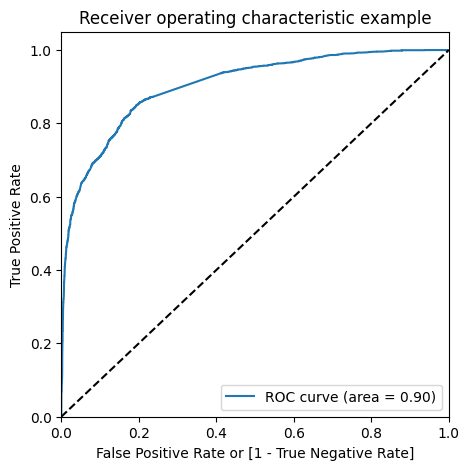

In [191]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

##### As we can see ROC curve is quite good, it is covering around 90% area.

## 8. Finding Optimal Cutoff Point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

###### Let's create columns with different probability cutoffs 


In [192]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.119810,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.133466,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.179170,9226,0,1,1,0,0,0,0,0,0,0,0
3,1,0.505467,4750,1,1,1,1,1,1,1,0,0,0,0
4,1,0.608323,7987,1,1,1,1,1,1,1,1,0,0,0


##### Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.


In [193]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.635490  0.964023  0.429706
0.2   0.2  0.810581  0.867539  0.774904
0.3   0.3  0.824122  0.839330  0.814597
0.4   0.4  0.827744  0.786182  0.853777
0.5   0.5  0.826484  0.714227  0.896799
0.6   0.6  0.827586  0.651676  0.937772
0.7   0.7  0.819241  0.587899  0.964149
0.8   0.8  0.806487  0.534751  0.976697
0.9   0.9  0.772319  0.425593  0.989501


##### Let's plot accuracy sensitivity and specificity for various probabilities.


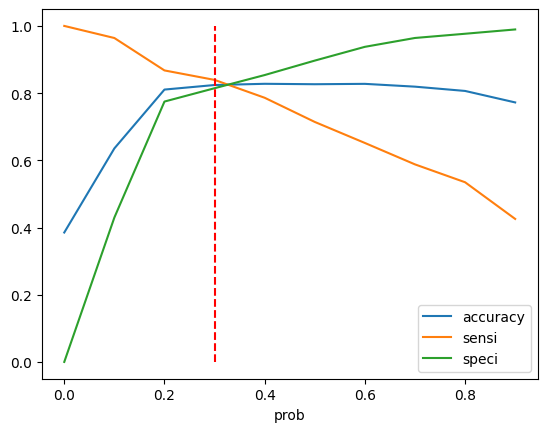

In [194]:
ax =cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
ax.vlines(x=0.3, ymax=1, ymin=0, colors="r", linestyles="--")

plt.show()

#### From the curve above, 0.25 is the optimum point to take it as a cutoff probability.


In [195]:

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.25 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.119810,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.133466,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.179170,9226,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.505467,4750,1,1,1,1,1,1,1,0,0,0,0,1
4,1,0.608323,7987,1,1,1,1,1,1,1,1,0,0,0,1


<hr>

## 9. Assigning Lead Score to leads in Train Set

In [196]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.119810,3009,0,1,1,0,0,0,0,0,0,0,0,0,12
1,0,0.133466,1012,0,1,1,0,0,0,0,0,0,0,0,0,13
2,0,0.179170,9226,0,1,1,0,0,0,0,0,0,0,0,0,18
3,1,0.505467,4750,1,1,1,1,1,1,1,0,0,0,0,1,51
4,1,0.608323,7987,1,1,1,1,1,1,1,1,0,0,0,1,61


#### Let's check the overall accuracy.


In [197]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

print('TP -',TP,'\nTN -',TN,'\nFP -', FP,'\nFN -', FN)

TP - 2096 
TN - 3113 
FP - 792 
FN - 350


#### Let's see the sensitivity of our logistic regression model


In [198]:
TP / float(TP+FN)

0.856909239574816

#### Let us calculate specificity


In [199]:
TN / float(TN+FP)

0.7971830985915493

#### Calculate false postive rate - predicting churn when customer does not have churned


In [200]:
print(FP/ float(TN+FP))

0.2028169014084507


#### Positive predictive value

In [201]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7257617728531855


#### Negative predictive value

In [202]:
# Negative predictive value
print (TN / float(TN+ FN))

0.898931562229281


#### All metrics-

    1. Sensitivity : 85.69%
    2. Specificity : 79.71%
    3. false postive rate : 20.28%
    4. Positive predictive value : 72.57%
    5. Negative predictive value : 89.89%

<hr>

### Precision and Recall

In [203]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3334,  571],
       [ 523, 1923]], dtype=int64)

#### Precision
##### TP / TP + FP


In [204]:

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7710505212510024

#### Recall
#####  TP / TP + FN

In [205]:


confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.786181520850368

## 10. Precision and recall tradeoff

In [206]:
from sklearn.metrics import precision_recall_curve


In [207]:
y_train_pred_final.Converted, y_train_pred_final.predicted


(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [208]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

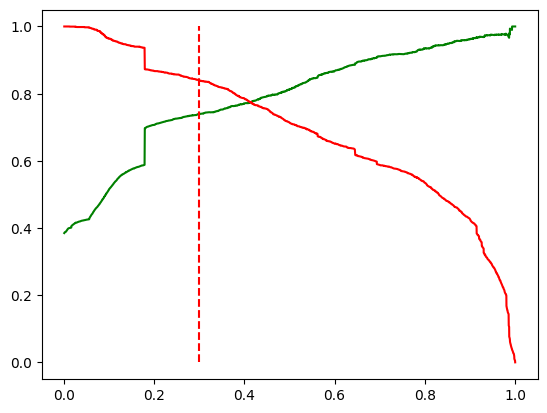

In [209]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.vlines(x=0.3, ymax=1, ymin=0, colors="r", linestyles="--")

plt.show()

If we wanted a balanced model we might have gone for 0.42 or something but we need to get as much hot leads as possible. Let's go with a higher sensitiivty, we can trade a little bit of specificity for this case as business does not requires.

<hr>

## 11. Making predictions on the test set

In [210]:
temp = scaler.fit_transform(X_test.loc[:,['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])


X_test.loc[:,['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = temp

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_LeadSource,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0


In [211]:
X_test = X_test[col]
X_test=X_test*1
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Referral Sites,Lead Source_Welingak Website,Occupation_Working Professional,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst
3271,0,-0.591008,0,0,0,0,0,0,0,0,1,0
1490,0,1.894051,1,0,0,0,0,1,1,0,0,0
7936,0,-0.743117,0,0,0,0,0,0,0,0,1,0
4216,0,-0.878732,0,1,0,0,0,0,1,0,0,0
3830,0,-0.578179,1,0,0,0,0,0,0,0,1,0


In [212]:
X_test_sm = sm.add_constant(X_test)

#### Making predictions on the test set



In [213]:
X_test_sm['Do Not Email']=X_test_sm['Do Not Email'].astype(int)
X_test_sm.dtypes

const                                  float64
Do Not Email                             int32
Total Time Spent on Website            float64
Lead Origin_Landing Page Submission      int32
Lead Origin_Lead Add Form                int32
Lead Source_Olark Chat                   int32
Lead Source_Referral Sites               int32
Lead Source_Welingak Website             int32
Occupation_Working Professional          int32
Lead Quality_Low in Relevance            int32
Lead Quality_Might be                    int32
Lead Quality_Not Sure                    int32
Lead Quality_Worst                       int32
dtype: object

In [214]:
y_test_pred = res.predict(X_test_sm)


In [215]:
y_test_pred.head(10)


3271    0.107247
1490    0.988831
7936    0.092021
4216    0.930832
3830    0.078609
1800    0.823395
6507    0.073570
4821    0.197780
4223    0.986690
4714    0.180806
dtype: float64

#### Converting y_pred to a dataframe which is an array


In [216]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [217]:
# Let's see the head
y_pred_1.head()

,0
3271,0.107247
1490,0.988831
7936,0.092021
4216,0.930832
3830,0.078609


#### Converting y_test to dataframe


In [218]:
y_test_df = pd.DataFrame(y_test)

#### Putting CustID to index


In [219]:
y_test_df['Prospect ID'] = y_test_df.index

####  Removing index for both dataframes to append them side by side 


In [220]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

#### Appending y_test_df and y_pred_1


In [221]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [222]:
y_pred_final.head()


,Converted,Prospect ID,0
0,0,3271,0.107247
1,1,1490,0.988831
2,0,7936,0.092021
3,1,4216,0.930832
4,0,3830,0.078609


#### Renaming the column 


In [223]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})


#### Rearranging the columns


In [224]:
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]

In [225]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,3271,0,0.107247
1,1490,1,0.988831
2,7936,0,0.092021
3,4216,1,0.930832
4,3830,0,0.078609


In [226]:
temp = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.25 else 0)
y_pred_final.loc[:,'final_predicted'] = temp


In [227]:
y_pred_final['Lead Score'] = round(y_pred_final['Converted_prob']*100,2)

In [228]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead Score
0,3271,0,0.107247,0,10.72
1,1490,1,0.988831,1,98.88
2,7936,0,0.092021,0,9.20
3,4216,1,0.930832,1,93.08
4,3830,0,0.078609,0,7.86


## 12. Model Evaluation on test set

#### Accuracy`

In [229]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8259272860815278

In [230]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1415,  319],
       [ 155,  834]], dtype=int64)

#### Confusion Matrix

In [231]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

#### Sensitivity

In [232]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8432760364004045

####  Specificity

In [233]:
# Let us calculate specificity
TN / float(TN+FP)

0.8160322952710496

#### Precision

In [234]:
# Precision
TP/(FP+TP)

0.7233304423243712

#### Recall

In [235]:
# Recall
confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.8432760364004045

All Metrics -

1. Sensitivity : 84.32%
2. Specificity : 81.60%
3. Precision   : 72.33%
4. Recall      : 84.32%
5. Accuracy    : 82.59%
    
Model was able to catch more than 84% of correct positive values, i.e. it was able to predict 84% of times if a lead is going to convert or not.

And it was nearly 84% of time correct when it says a lead is going to convert.


## 13. Generating Hot leads

In [236]:
hot_lead = y_pred_final.loc[y_pred_final['Lead Score'] > 60, :]

In [237]:
hot_lead.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead Score
1,1490,1,0.988831,1,98.88
3,4216,1,0.930832,1,93.08
5,1800,1,0.823395,1,82.34
8,4223,1,0.986690,1,98.67
14,2570,1,0.695810,1,69.58


In [238]:
hot_lead.shape

(752, 5)

In [239]:
hot_lead.Converted.mean()

0.8404255319148937

## 14. Conclusion

##### we have more than 84% conversion rate for the hot_leads model suggested. we can see that there is a huge difference in number of leads sales team have to work on. this way their productivity will increase as well.

# -----------------------------------------------------------------------------------------------------------

## subjective answers

In [240]:
res.params


const                                  2.586070
Do Not Email                          -1.294756
Total Time Spent on Website            1.117845
Lead Origin_Landing Page Submission   -0.356571
Lead Origin_Lead Add Form              2.702024
Lead Source_Olark Chat                 0.929907
Lead Source_Referral Sites            -0.937645
Lead Source_Welingak Website           3.661972
Occupation_Working Professional        1.842879
Lead Quality_Low in Relevance         -1.706268
Lead Quality_Might be                 -1.926080
Lead Quality_Not Sure                 -4.044587
Lead Quality_Worst                    -6.593489
dtype: float64

In [241]:
var_imp = pd.Series(res.params)
var_imp = var_imp.sort_values(ascending=False)
var_imp = pd.DataFrame(var_imp, columns = ['score (coeff_)'])
var_imp

,score (coeff_)
Lead Source_Welingak Website,3.661972
Lead Origin_Lead Add Form,2.702024
const,2.586070
Occupation_Working Professional,1.842879
Total Time Spent on Website,1.117845
Lead Source_Olark Chat,0.929907
Lead Origin_Landing Page Submission,-0.356571
Lead Source_Referral Sites,-0.937645
Do Not Email,-1.294756
Lead Quality_Low in Relevance,-1.706268


##### Answer 1 and 2:

Here top 3 variables which contribute most towards probability of a lead getting converted are:

1. Lead Source_Welingak Website with coefficient of 3.66
2. Lead Origin_lead Add Form with coefficient 2.70
3. Occupation_Working Professional with coefficient 1.84

<hr>

#### Question 3:


X Education has a period of 2 months every year during which they hire some interns. The sales team, in particular, has around 10 interns allotted to them. So, during this phase, they wish to make the lead conversion more aggressive. So, they want almost all of the potential leads (i.e. the customers who have been predicted as 1 by the model) to be converted and hence, want to make phone calls to as much of such people as possible. Suggest a good strategy they should employ at this stage.

#### Answer:

In [242]:
all_pred_leads = y_pred_final.loc[y_pred_final['final_predicted'] == 1, :]
all_pred_leads = all_pred_leads.sort_values(by='Lead Score', ascending = False)

In [243]:
all_pred_leads.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead Score
573,373,1,0.999654,1,99.97
140,737,1,0.999654,1,99.97
655,802,1,0.999654,1,99.97
2565,5293,1,0.999641,1,99.96
868,2495,1,0.999605,1,99.96


In [244]:
all_pred_leads.shape

(1153, 5)

In [245]:
most_hotleads = y_pred_final.loc[y_pred_final['Lead Score'] > 95, :]
most_hotleads.Converted.mean() * 100

96.22641509433963

If as per Question says, Sales team have resources as well as time to reach out as many leads as possible. Then perfect strategy would be to consider all the predicted leads. 
We have created a dataframe above named as 'all_pred_leads', just like this dataset, where all leads are sorted on the basis of their leadscore (probability of being converted). Sales team just need to approach all leads according to this dataset from top to bottom as much as they can, this format will ensure that you convert most probable leads in start of your work session and even if you are not able to reach out all of the leads you'll only loose low probability leads.


<hr>

#### Question 4:

Similarly, at times, the company reaches its target for a quarter before the deadline. During this time, the company wants the sales team to focus on some new work as well. So, during this time, the company’s aim is to not make phone calls unless it’s extremely necessary, i.e. they want to minimize the rate of useless phone calls. Suggest a strategy they should employ at this stage

#### Answer:

In [246]:
most_hotleads = most_hotleads.sort_values(by='Lead Score', ascending = False)

In [247]:
most_hotleads.Converted.mean() * 100

96.22641509433963

In [248]:
most_hotleads.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead Score
655,802,1,0.999654,1,99.97
140,737,1,0.999654,1,99.97
573,373,1,0.999654,1,99.97
868,2495,1,0.999605,1,99.96
2565,5293,1,0.999641,1,99.96


In [249]:
most_hotleads.shape

(265, 5)

In [250]:
most_hotleads.Converted.mean()

0.9622641509433962

For this scenario, we should reach out to only those leads for which model is giving high lead score. This way we have more chances of lead conversion and less chances of useless phonecall. As we know no model can give perfect predictions. But if we try to contact leads with more than 95 leadscore we may get more than 96% conversion rate. Suppose if sales team want to loosen up a bit and have spare time to call more leads then it can also go to leadscore may be all above 80. So this approach is best when a company have limited resources to use and still want to have higher conversion rate.

Thank you 